#What Affects Team Wins? The Case for a New Triple-Slash Line

Andrew Haughin-Scasny, 9/26/25

#Introduction

Baseball is a sport whose history is defined by its various eras, with each defined by a major change to the sport and how it was appreciated - the "dead-ball" era of low offense, the Integration Era heralded by Jackie Robinson's arrival in 1947, the Expansion Era with 1961 seeing the first new franchises in decades, etc. Our current era's starting point is more nebulous, but one framing has it beginning in 2002, with the "Moneyball" Oakland Athletics popularizing the belief that OBP is a more important metric for a hitter's offensive production than AVG. The data-driven approach that fueled this shift also found that SLG is even more important than AVG for predicting how well a hitter will generate runs. As much as some "old-school" fans have bemoaned the decline in AVG that has come with the widespread adoption of this philosophy, the data are clear that in the triple-slash line of AVG/OBP/SLG, AVG is the least important.

Ben Clemens wrote [a great piece at Fangraphs](https://blogs.fangraphs.com/triple-slash-line-conundrum-voros-mccracken-edition/) in January 2023 on the relative importance of AVG, OBP, and SLG. He opens with an X poll from Tom Tango that asked readers to choose between two hypothetical hitters with identical OBP and SLG, but different AVG. Voters in that poll selected the player with the higher AVG as more valuable. However, the analysis by Clemens of hitters in every full season from 2010 to the date of writing found that for a given OBP and SLG, an increased AVG slightly predicted a *weaker* performance. Clemens uses this, as well as a multivariate regression finding that adding AVG to a model using OBP and SLG barely affects model performance, to support the contemporary wisdom that OBP and SLG are more predictive of offensive performance than AVG, a view that is sometimes taken to the point of saying, "AVG doesn't matter."

There's no disputing Clemens's data. But there's an important point about OBP and SLG that is not mentioned in that argument: they both rely on AVG as part of their calculation, summing* it with other offensive data. This means that if you hold OBP and SLG constant, an increase in AVG *requires* a reduction in other elements of offensive performance - namely, BBs (and HBP) for OBP and ISO for SLG. Through this lens, where improvement in one aspect of offense requires worsening two other important aspects, Clemens's results are not all that surprising.

This highlights a weakness of the triple-slash line as currently constructed: while OBP and SLG are powerful metrics that provide important information about scoring runs, their information about getting on base safely outside of getting a hit and how powerful hits are, respectively, is confounded by the inclusion of AVG.

In this notebook, I will **lay out the case for a new triple-slash line: AVG/BB%/ISO.** This will come from analysis of team-level statistics from every full season since 2002, as well as an analysis of 1969-1993. This analysis will demonstrate that AVG/BB%/ISO has effectively identical predictive power with respect to runs scored as AVG/OBP/SLG, at least at the team level, while revealing at a glance the additional information OBP and SLG provide with respect to AVG.

In the course of this analysis, I will also look at other statistics that have been viewed as more or less important over time, such as K% and SB, judging how accurate contemporary wisdom is about their impact on the game. Additionally, I will look at pitching to **propose a pitcher triple-slash line of WHIP/HR%/K%.**

Finally, I will look at data from the playoffs to see whether the statistics that matter in the regular season matter to a similar extent in the playoffs, as well as examine the correlation between how well a team does in those metrics during the regular season and how they perform in the playoffs.

*The denominators for AVG and OBP are different - respectively, AB and PA - so it's not a strict summation, but OBP still represents a combination of information on hits and walks.

#Data Source

These analyses will use the Team Stats dataset from Retrosheet, which contains information about games since 1871. The generous licensing terms of Retrosheet are that all uses of their data are permitted, so long as the following statement is featured prominently:

*The information used here was obtained free of charge from and is copyrighted by Retrosheet. Interested parties may contact Retrosheet at 20 Sunset Rd., Newark, DE 19711.*

#Results

In [ ]:
#Install libraries

!pip install -q pandas


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#Analysis of 2002-2024

Games from the very early days of the sport introduce mixed data types into some key columns. Since we are not going to look at those games, we'll use CSV files that I manually truncated to only include our time frames of interest.

In [ ]:
#Load Retrosheet dataset

df = pd.read_csv('2002_24_teamstats.csv')
df.head()

gid team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
0  ANA200203310  CLE     4     0     1     0   0.0   0.0   0.0   0.0  ...   
1  ANA200203310  ANA     0     0     0     0   0.0   0.0   0.0   0.0  ...   
2  ARI200204010  SDN     0     0     0     0   0.0   0.0   0.0   0.0  ...   
3  ARI200204010  ARI     0     0     1     0   0.0   0.0   1.0   0.0  ...   
4  ATL200204010  PHI     0     0     0     0   0.0   0.0   2.0   0.0  ...   

   number   site  vishome  opp  win  loss  tie  gametype  box  pbp  
0       0  ANA01        v  ANA    1     0    0   regular    y    y  
1       0  ANA01        h  CLE    0     1    0   regular    y    y  
2       0  PHO01        v  ARI    0     1    0   regular    y    y  
3       0  PHO01        h  SDN    1     0    0   regular    y    y  
4       0  ATL02        v  ATL    0     1    0   regular    y    y  

[5 rows x 111 columns]

In [ ]:
#Determine how dates are structured in Retrosheet dataset
df['date'].head()

0    20020331
1    20020331
2    20020401
3    20020401
4    20020401
Name: date, dtype: int64

Since the dates are stored as a float starting with the year, we can filter by eliminating any dates less than 20020000 or between 20200000 and 20210000.

In [ ]:
#Select for dates not in year 2020
df_0224 = df[((df['date'] > 20020000) & (df['date']<20200000)) | (df['date']>20210000)]
df_0224.head()

gid team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
0  ANA200203310  CLE     4     0     1     0   0.0   0.0   0.0   0.0  ...   
1  ANA200203310  ANA     0     0     0     0   0.0   0.0   0.0   0.0  ...   
2  ARI200204010  SDN     0     0     0     0   0.0   0.0   0.0   0.0  ...   
3  ARI200204010  ARI     0     0     1     0   0.0   0.0   1.0   0.0  ...   
4  ATL200204010  PHI     0     0     0     0   0.0   0.0   2.0   0.0  ...   

   number   site  vishome  opp  win  loss  tie  gametype  box  pbp  
0       0  ANA01        v  ANA    1     0    0   regular    y    y  
1       0  ANA01        h  CLE    0     1    0   regular    y    y  
2       0  PHO01        v  ARI    0     1    0   regular    y    y  
3       0  PHO01        h  SDN    1     0    0   regular    y    y  
4       0  ATL02        v  ATL    0     1    0   regular    y    y  

[5 rows x 111 columns]

In [ ]:
#We only want to look at regular-season games, so we'll need to filter on gametype.
df_0224 = df_0224[df_0224['gametype']=='regular']

Most columns here contain information we don't need. Let's first rename the columns we want to preserve. Columns are renamed with respect to batter or pitcher; most pitcher variables will be specified with A (for allowed), most unspecified stat columns will be for batters. The exception to this is ER (a stat that typically only exists for pitchers).

In [ ]:
df_0224 = df_0224.rename(columns={'gid': 'Game ID', 'team': 'Team', 'lob': 'LOB', 'b_pa': 'PA', 'b_ab': 'AB', 'b_r': 'R', 'b_h': 'H',
                        'b_d': '2B', 'b_t': '3B','b_hr': 'HR', 'b_rbi': 'RBI', 'b_sh': 'SH', 'b_sf': 'SF', 'b_hbp': 'HBP',
                        'b_w': 'BB', 'b_iw': 'IBB', 'b_k': 'K', 'b_sb': 'SB', 'b_cs': 'CS', 'b_gdp': 'GIDP',
                        'p_ipouts': 'Pitcher Outs', 'p_bfp': 'BF', 'p_h': 'HA', 'p_d': '2BA', 'p_t': '3BA', 'p_hr': 'HRA',
                        'p_r': 'RA', 'p_er': 'ER', 'p_w': 'BBA', 'p_iw': 'IBBA', 'p_k': 'KA', 'p_hbp': 'HBPA',
                        'p_sh': 'SHA', 'p_sf': 'SFA', 'd_sb': 'SBA', 'd_cs': 'CSA', 'date': 'Date', 'win': 'W',
                        'loss': 'L'})
df_0224.head()

Game ID Team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
0  ANA200203310  CLE     4     0     1     0   0.0   0.0   0.0   0.0  ...   
1  ANA200203310  ANA     0     0     0     0   0.0   0.0   0.0   0.0  ...   
2  ARI200204010  SDN     0     0     0     0   0.0   0.0   0.0   0.0  ...   
3  ARI200204010  ARI     0     0     1     0   0.0   0.0   1.0   0.0  ...   
4  ATL200204010  PHI     0     0     0     0   0.0   0.0   2.0   0.0  ...   

   number   site  vishome  opp  W  L  tie  gametype  box  pbp  
0       0  ANA01        v  ANA  1  0    0   regular    y    y  
1       0  ANA01        h  CLE  0  1    0   regular    y    y  
2       0  PHO01        v  ARI  0  1    0   regular    y    y  
3       0  PHO01        h  SDN  1  0    0   regular    y    y  
4       0  ATL02        v  ATL  0  1    0   regular    y    y  

[5 rows x 111 columns]

In [ ]:
#Now let's limit the data frame to the metrics we may explore.

df_0224 = df_0224[['Game ID', 'Team', 'Date', 'W', 'L', 'LOB', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SH', 'SF', 'HBP', 'BB', 'IBB', 'K',
          'SB', 'CS', 'GIDP', 'Pitcher Outs', 'BF','HA', '2BA', '3BA', 'HRA', 'RA', 'ER', 'BBA', 'IBBA', 'KA', 'HBPA',
          'SHA', 'SFA', 'SBA', 'CSA']]
df_0224.head()


Game ID Team      Date  W  L  LOB  PA  AB  R   H  ...  RA  ER  BBA  \
0  ANA200203310  CLE  20020331  1  0    5  38  35  6  11  ...   0   0    2   
1  ANA200203310  ANA  20020331  0  1    6  33  31  0   5  ...   6   6    3   
2  ARI200204010  SDN  20020401  0  1    6  33  32  0   6  ...   2   2    1   
3  ARI200204010  ARI  20020401  1  0    3  29  28  2   5  ...   0   0    1   
4  ATL200204010  PHI  20020401  0  1    5  34  31  2   5  ...   7   4    4   

   IBBA  KA  HBPA  SHA  SFA  SBA  CSA  
0     0   5     0    0    0    0    0  
1     0   9     0    0    0    0    0  
2     0   4     0    0    0    0    0  
3     0   8     0    0    0    0    0  
4     0   4     0    0    0    0    0  

[5 rows x 39 columns]

In [ ]:
#We need to create a season column based on the date.
df_0224['Season'] = df_0224['Date'].astype(str).str.slice(0,4)
df_0224['Season'] = df_0224['Season'].astype(int)
df_0224['Season'].tail()

110297    2024
110298    2024
110299    2024
110300    2024
110301    2024
Name: Season, dtype: int64

Now let's assemble the stats.

In [ ]:
#Get column names
columns = df_0224.columns.to_list()
#Omit non-statistic columns
metrics = columns[2:]
metrics.remove('Date')
metrics.remove('Season')
years = df_0224['Season'].unique()


stats_0224 = pd.DataFrame()
for year in years:
  #Concatenate together into a single dataframe of teams, seasons
  season_stats = pd.DataFrame()
  for metric in metrics:
    season_stats[metric] = df_0224[df_0224['Season']==year].groupby('Team')[metric].sum()
  stats_0224 = pd.concat([stats_0224, season_stats])
stats_0224 = stats_0224.reset_index()


stats_0224

Team    W   L   LOB    PA    AB    R     H   2B  3B  ...   RA   ER  BBA  \
0    ANA   99  63  1165  6327  5678  851  1603  333  32  ...  644  595  509   
1    ARI   98  64  1211  6318  5508  819  1471  283  41  ...  674  631  421   
2    ATL  101  59  1185  6224  5495  708  1428  280  25  ...  565  511  554   
3    BAL   67  95  1037  6096  5491  667  1353  311  27  ...  773  719  549   
4    BOS   93  69  1175  6332  5640  859  1560  348  33  ...  665  603  430   
..   ...  ...  ..   ...   ...   ...  ...   ...  ...  ..  ...  ...  ...  ...   
655  SLN   83  79  1125  6114  5507  672  1363  257  21  ...  719  648  454   
656  TBA   80  82  1076  6006  5389  604  1241  245  23  ...  663  604  445   
657  TEX   78  84  1070  6053  5472  683  1302  220  15  ...  738  690  530   
658  TOR   74  88  1090  6060  5410  671  1306  280  26  ...  743  681  503   
659  WAS   71  91   990  5971  5374  660  1306  267  18  ...  764  685  473   

     IBBA    KA  HBPA  SHA  SFA  SBA  CSA  
0      24   999    49   27   59   78   51  
1      30  1303    54   45   36   77   43  
2      63  1058    42   74   32   96   55  
3      34   967    54   20   38  103   44  
4      29  1157    84   30   52  118   50  
..    ...   ...   ...  ...  ...  ...  ...  
655    16  1308    42   17   53  153   29  
656    15  1406    65   16   36  119   28  
657    26  1371    74   13   44  140   20  
658    25  1314    71   17   40  119   37  
659    11  1314    43   14   44  132   30  

[660 rows x 37 columns]

Let's generate some common statistics from this table.

Our key metrics of runs scored, runs allowed, and wins will be normalized to the number of games in a season, since some seasons included a tie-breaker Game 163 or left games unplayed due to a lack of impact on the final standings.

In [ ]:
#Batting Average
stats_0224['AVG'] = stats_0224['H']/stats_0224['AB']

#OBP
stats_0224['OBP'] = (stats_0224['H']+stats_0224['BB']+stats_0224['HBP'])/(stats_0224['AB']+stats_0224['BB']+stats_0224['HBP']+stats_0224['SF'])

#Singles
stats_0224['1B'] = stats_0224['H']-(stats_0224['2B']+stats_0224['3B']+stats_0224['HR'])

#SLG
stats_0224['SLG'] = (stats_0224['1B']+2*stats_0224['2B']+3*stats_0224['3B']+4*stats_0224['HR'])/stats_0224['AB']

#ISO
stats_0224['ISO'] = stats_0224['SLG']-stats_0224['AVG']

#BB%
stats_0224['BB%'] = stats_0224['BB']/stats_0224['PA']

#K%
stats_0224['K%'] = stats_0224['K']/stats_0224['PA']

#LOBa, approximate LOB%
stats_0224['LOBa'] = stats_0224['LOB']/(stats_0224['H']+stats_0224['BB']+stats_0224['HBP']-stats_0224['HR'])*100

#HR%
stats_0224['HR%'] = stats_0224['HR']/stats_0224['PA']

#BABIP
stats_0224['BABIP'] = (stats_0224['H']-stats_0224['HR'])/(stats_0224['AB'] - stats_0224['K']
                                                          - stats_0224['HR'] + stats_0224['SF'])

#SB%
stats_0224['SB%'] = stats_0224['SB']/(stats_0224['SB']+stats_0224['CS'])

#SBV, which calculates how many steals/caught stealing attempts the team is over/under the SB:CS ratio for being
#a net positive (novel)

stats_0224['SBV'] = stats_0224['SB']-3*stats_0224['CS']

#IP
stats_0224['IP']= stats_0224['Pitcher Outs']/3

#ERA
stats_0224['ERA']= stats_0224['ER']/stats_0224['IP']*9

#FIPa, which lacks the constant that brings it in line with ERA (semi-novel)
stats_0224['FIPa'] = (13*stats_0224['HRA'] + 3*(stats_0224['BBA'] + stats_0224['HBPA']) - 2*stats_0224['KA'])/stats_0224['IP']

#FIPh, which measures the FIP (with PA as the denominator) of the collective pitching a team's hitters have faced (novel)
stats_0224['FIPh'] = (13*stats_0224['HR'] + 3*(stats_0224['BB'] + stats_0224['HBP']) - 2*stats_0224['K'])/stats_0224['PA']

#2B%, the percentage of PAs resulting in a 2B
stats_0224['2B%'] = stats_0224['2B']/stats_0224['PA']*100

#AVGA, AVG against pitching staff
stats_0224['AVGA']= stats_0224['HA']/stats_0224['BF']

#WHIP, walks and hits per IP
stats_0224['WHIP'] = (stats_0224['HA']+stats_0224['BBA'])/stats_0224['IP']

#BB%A, BB% for pitchers
stats_0224['BB%A']= stats_0224['BBA']/stats_0224['BF']*100

#K%A, K% for pitchers
stats_0224['K%A']= stats_0224['KA']/stats_0224['BF']*100

#HR%A, HR% for pitchers
stats_0224['HR%A']= stats_0224['HRA']/stats_0224['BF']*100

#Pythagorean record, which uses runs scored and allowed to predict team record
stats_0224['PR'] = stats_0224['PR'] = (stats_0224['R'])**2/((stats_0224['R'])**2 + (stats_0224['RA'])**2)*(stats_0224['W']+stats_0224['L'])

#Runs per game
stats_0224['RPG'] = stats_0224['R']/(stats_0224['W'] + stats_0224['L'])

#Runs allowed per game
stats_0224['RAPG'] = stats_0224['RA']/(stats_0224['W'] + stats_0224['L'])

#Winning percentage
stats_0224['W%'] = stats_0224['W']/(stats_0224['W'] + stats_0224['L'])

We need to reintroduce season information to the table.

In [ ]:
#Make Pandas series of each season repeated 30 times to add onto chart
seasons = pd.Series(years)
seasons = seasons.repeat(30).reset_index(drop=True)
stats_0224['Season'] = seasons

stats_0224

Team    W   L   LOB    PA    AB    R     H   2B  3B  ...      AVGA  \
0    ANA   99  63  1165  6327  5678  851  1603  333  32  ...  0.220600   
1    ARI   98  64  1211  6318  5508  819  1471  283  41  ...  0.224328   
2    ATL  101  59  1185  6224  5495  708  1428  280  25  ...  0.212363   
3    BAL   67  95  1037  6096  5491  667  1353  311  27  ...  0.238255   
4    BOS   93  69  1175  6332  5640  859  1560  348  33  ...  0.221359   
..   ...  ...  ..   ...   ...   ...  ...   ...  ...  ..  ...       ...   
655  SLN   83  79  1125  6114  5507  672  1363  257  21  ...  0.225513   
656  TBA   80  82  1076  6006  5389  604  1241  245  23  ...  0.213550   
657  TEX   78  84  1070  6053  5472  683  1302  220  15  ...  0.216601   
658  TOR   74  88  1090  6060  5410  671  1306  280  26  ...  0.217629   
659  WAS   71  91   990  5971  5374  660  1306  267  18  ...  0.233726   

         WHIP      BB%A        K%A      HR%A          PR       RPG      RAPG  \
0    1.276566  8.348368  16.385107  2.771855  103.008825  5.253086  3.975309   
1    1.231797  6.939179  21.476842  2.802044   96.586407  5.055556  4.160494   
2    1.264880  9.036046  17.256565  2.006198   97.749318  4.425000  3.531250   
3    1.406250  8.772771  15.452221  3.323746   69.139269  4.117284  4.771605   
4    1.223375  7.108613  19.127128  2.413622  101.293208  5.302469  4.104938   
..        ...       ...        ...       ...         ...       ...       ...   
655  1.258310  7.511582  21.641297  2.878888   75.532482  4.148148  4.438272   
656  1.201527  7.389572  23.347725  3.254733   73.472519  3.728395  4.092593   
657  1.297922  8.677145  22.445972  3.241650   74.739147  4.216049  4.555556   
658  1.274404  8.318174  21.729783  3.439722   72.772393  4.141975  4.586420   
659  1.326360  7.736343  21.491658  2.747792   69.231313  4.074074  4.716049   

           W%  Season  
0    0.611111    2002  
1    0.604938    2002  
2    0.631250    2002  
3    0.413580    2002  
4    0.574074    2002  
..        ...     ...  
655  0.512346    2024  
656  0.493827    2024  
657  0.481481    2024  
658  0.456790    2024  
659  0.438272    2024  

[660 rows x 64 columns]

Now we will normalize the statistics, separating by year. This will help control for differences in offensive
environment year-to-year, which can be quite drastic (e.g., the "juiced ball" of 2019 causing a spike in HRs, the "spider tack" era of the early 2020s having high K rates).

It is important to note that this is a somewhat distinct approach from how many typical "modern" statistics work. Metrics such as weighted on-base average (wOBA) aim to measure the number of runs each event is worth. Normalizing with z-scores, however, has us examining the relationship between deviation from the mean on a given statistic and deviation from the mean in runs (scored or allowed). So if we were to, for example, find in this analysis that H and BB had an equal correlation with R, it doesn't mean that a hit and a walk are of equal value. Rather, it means that being a given number of standard deviations from the mean in H is of equal value to scoring an above-average amount of runs as being the same number of standard deviations from the mean in BB - in other words, they're of equal importance to excel in.

In [ ]:
#Get column names
columns = stats_0224.columns.to_list()
#Omit non-statistic columns
metrics = columns[3:]
metrics.remove('Season')
metrics.remove('W%')
metrics

norm_0224 = pd.DataFrame()
for year in years:
  #Concatenate together into a single dataframe of teams, seasons,
  season_stats = pd.DataFrame()
  for metric in metrics:
    lg_avg = stats_0224.loc[stats_0224['Season']==year,metric].mean()
    lg_std = stats_0224.loc[stats_0224['Season']==year,metric].std()
    season_stats[metric] = (stats_0224.loc[stats_0224['Season']==year, metric] - lg_avg)/lg_std
  norm_0224 = pd.concat([norm_0224, season_stats])

#Add back team names, records
norm_0224 = pd.concat([stats_0224.iloc[:,0:2], norm_0224], axis=1)
#Add back season and W%
norm_0224 = pd.concat([norm_0224, stats_0224.iloc[:,-2:]], axis=1)

norm_0224

Team    W       LOB        PA        AB         R         H        2B  \
0    ANA   99  0.313746  1.041083  2.177270  1.337932  2.265802  1.600065   
1    ARI   98  1.100961  0.953104 -0.156500  0.926525  0.403499 -0.260476   
2    ATL  101  0.656013  0.034214 -0.334965 -0.500546 -0.203160 -0.372108   
3    BAL   67 -1.876769 -1.217041 -0.389877 -1.027662 -1.261287  0.781427   
4    BOS   93  0.484879  1.089960  1.655604  1.440784  1.659143  2.158227   
..   ...  ...       ...       ...       ...       ...       ...       ...   
655  SLN   83  1.398895  0.330084  0.706284 -0.522536  0.480145 -0.088412   
656  TBA   80  0.367096 -0.771330 -0.935374 -1.423612 -1.166838 -0.610185   
657  TEX   78  0.240753 -0.292011  0.219351 -0.376774 -0.343346 -1.697214   
658  TOR   74  0.661895 -0.220623 -0.643214 -0.535787 -0.289347  0.911655   
659  WAS   71 -1.443816 -1.128270 -1.144059 -0.681549 -0.289347  0.346400   

           3B        HR  ...      AVGA      WHIP      BB%A       K%A  \
0    0.186948 -0.608470  ... -1.085067 -1.086460 -0.338976 -0.231781   
1    1.481207 -0.132912  ... -0.723026 -1.575885 -1.721249  2.383377   
2   -0.819697 -0.169494  ... -1.884977 -1.214223  0.335567  0.215807   
3   -0.532084 -0.132912  ...  0.629438  0.331263  0.077320 -0.710920   
4    0.330755  0.306064  ... -1.011396 -1.667960 -1.555052  1.176544   
..        ...       ...  ...       ...       ...       ...       ...   
655 -0.262238 -0.622367  ...  0.694147 -0.140490 -0.773773 -0.596109   
656 -0.027398 -1.290515  ... -0.432572 -0.820212 -0.916278  0.466647   
657 -0.966757 -0.214055  ... -0.145221  0.333682  0.587573 -0.094961   
658  0.324862 -0.956441  ... -0.048453  0.052166  0.168305 -0.541000   
659 -0.614497 -1.735947  ...  1.467701  0.674097 -0.511258 -0.689303   

         HR%A        PR       RPG      RAPG        W%  Season  
0    0.160532  1.505403  1.325667 -1.131934  0.611111    2002  
1    0.235599  1.065496  0.912139 -0.806677  0.604938    2002  
2   -1.743336  1.145150 -0.407921 -1.911874  0.631250    2002  
3    1.532853 -0.814509 -1.052121  0.266673  0.413580    2002  
4   -0.730243  1.387891  1.429049 -0.904254  0.574074    2002  
..        ...       ...       ...       ...       ...     ...  
655 -0.392586 -0.412162 -0.526078  0.099751  0.512346    2024  
656  0.962449 -0.566903 -1.426419 -0.665073  0.493827    2024  
657  0.915284 -0.471756 -0.380435  0.359245  0.481481    2024  
658  1.629394 -0.619495 -0.539319  0.427533  0.456790    2024  
659 -0.865228 -0.885495 -0.684962  0.714342  0.438272    2024  

[660 rows x 63 columns]

In [ ]:
norm_0224.describe()

W           LOB            PA            AB             R  \
count  660.000000  6.600000e+02  6.600000e+02  6.600000e+02  6.600000e+02   
mean    80.966667  1.917658e-17 -3.700743e-16  2.529963e-16  1.201059e-16   
std     12.140257  9.839378e-01  9.839378e-01  9.839378e-01  9.839378e-01   
min     41.000000 -2.392512e+00 -2.937516e+00 -3.033906e+00 -2.708971e+00   
25%     72.000000 -6.692571e-01 -6.766904e-01 -6.931253e-01 -7.058990e-01   
50%     81.500000  1.477600e-02 -3.582681e-02 -2.394180e-02 -6.239896e-02   
75%     90.000000  7.040097e-01  6.952205e-01  6.468197e-01  6.728331e-01   
max    111.000000  2.674453e+00  2.464194e+00  2.763159e+00  3.450657e+00   

                  H            2B            3B            HR           RBI  \
count  6.600000e+02  6.600000e+02  6.600000e+02  6.600000e+02  6.600000e+02   
mean  -5.248327e-17 -4.440892e-17 -7.468773e-17  2.388662e-17 -2.018587e-17   
std    9.839378e-01  9.839378e-01  9.839378e-01  9.839378e-01  9.839378e-01   
min   -2.515324e+00 -2.705469e+00 -2.689182e+00 -2.727588e+00 -2.620694e+00   
25%   -7.277823e-01 -6.542206e-01 -7.390377e-01 -7.121026e-01 -6.875908e-01   
50%   -7.376641e-02 -4.288706e-02 -3.416177e-02 -1.832412e-02 -7.049097e-02   
75%    6.595891e-01  6.074208e-01  6.333252e-01  6.652121e-01  6.621902e-01   
max    2.783550e+00  3.092019e+00  3.100619e+00  3.079978e+00  3.476475e+00   

       ...          AVGA          WHIP          BB%A           K%A  \
count  ...  6.600000e+02  6.600000e+02  6.600000e+02  6.600000e+02   
mean   ... -8.777491e-16  5.652044e-17 -3.539256e-16 -2.691450e-17   
std    ...  9.839378e-01  9.839378e-01  9.839378e-01  9.839378e-01   
min    ... -3.241151e+00 -2.449960e+00 -3.096506e+00 -3.060525e+00   
25%    ... -6.440981e-01 -7.088324e-01 -6.663899e-01 -6.971950e-01   
50%    ... -2.165923e-02 -9.334869e-02  3.772588e-02 -1.458706e-02   
75%    ...  6.698387e-01  6.669155e-01  6.869266e-01  6.410105e-01   
max    ...  3.350620e+00  2.979197e+00  2.600031e+00  2.820860e+00   

               HR%A            PR           RPG          RAPG          W%  \
count  6.600000e+02  6.600000e+02  6.600000e+02  6.600000e+02  660.000000   
mean   1.638420e-16  1.187602e-16  1.100130e-16 -3.027881e-17    0.499996   
std    9.839378e-01  9.839378e-01  9.839378e-01  9.839378e-01    0.074951   
min   -3.009824e+00 -2.681718e+00 -2.710727e+00 -2.278056e+00    0.253086   
25%   -7.024959e-01 -7.397856e-01 -7.005020e-01 -7.178714e-01    0.444444   
50%   -4.243327e-02  8.760716e-03 -6.229925e-02 -9.618467e-02    0.504639   
75%    6.745480e-01  7.720691e-01  6.632095e-01  6.623063e-01    0.555556   
max    3.001384e+00  2.474426e+00  3.447940e+00  2.967843e+00    0.685185   

            Season  
count   660.000000  
mean   2012.681818  
std       6.613453  
min    2002.000000  
25%    2007.000000  
50%    2012.500000  
75%    2018.000000  
max    2024.000000  

[8 rows x 62 columns]

#Hitters, 2002-2024

Let's look at how the three pieces of the conventional triple slash line - AVG, OBP, SLG - correlate with runs.


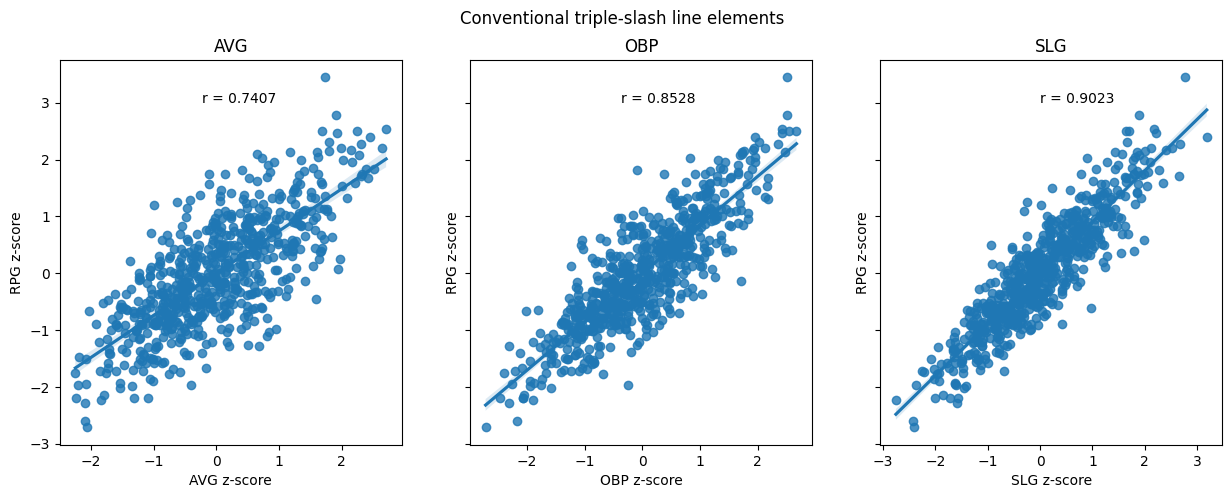

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Conventional triple-slash line elements')

#Plot AVG
sns.regplot(ax=axes[0],data=norm_0224, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['AVG'], y=norm_0224['RPG'])[0]
plt.text(-16, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('AVG z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('AVG')

#Plot OBP
sns.regplot(ax=axes[1],data=norm_0224, x='OBP', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['OBP'], y=norm_0224['RPG'])[0]
plt.text(-8, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('OBP z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('OBP')

#Plot SLG
sns.regplot(ax=axes[2],data=norm_0224, x='SLG', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['SLG'], y=norm_0224['RPG'])[0]
plt.text(0, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('SLG z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('SLG')
plt.show()

This agrees with the analysis from Clemens and countless prior analyses - in terms of predicting runs scored, SLG leads the way, followed by OBP and then AVG. Given that OBP and SLG layer additional information onto AVG, it should be no surprise that they are more predictive than AVG alone.

How do BB% and ISO - which represent the non-AVG components of OBP and SLG, respectively - compare with AVG in correlating with runs?

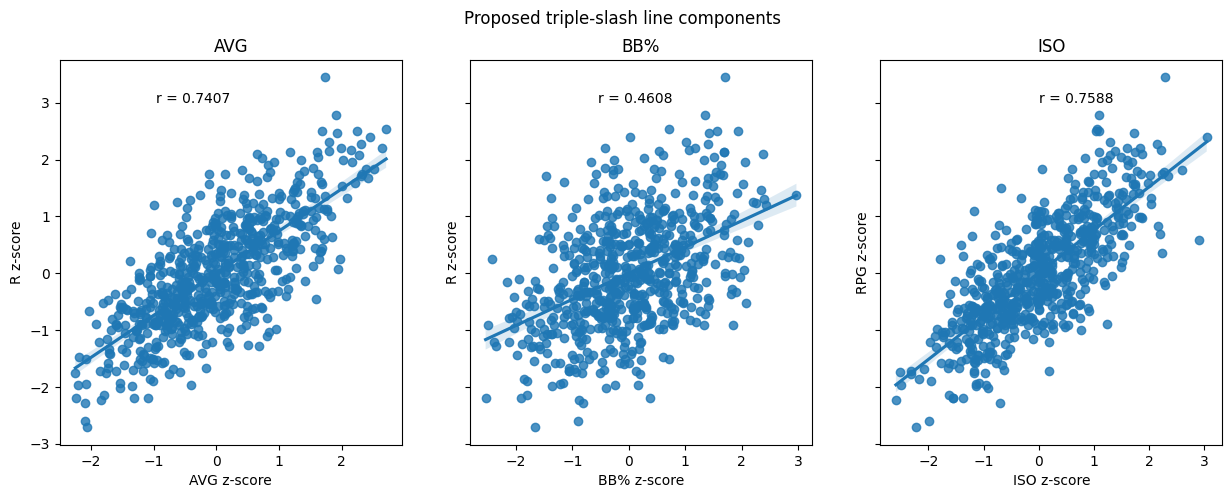

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Proposed triple-slash line components')

#Plot AVG
sns.regplot(ax=axes[0],data=norm_0224, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['AVG'], y=norm_0224['RPG'])[0]
plt.text(-16, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('AVG z-score')
axes[0].set_ylabel('R z-score')
axes[0].set_title('AVG')

#Plot BB%
sns.regplot(ax=axes[1],data=norm_0224, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['BB%'], y=norm_0224['RPG'])[0]
plt.text(-8, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('BB% z-score')
axes[1].set_ylabel('R z-score')
axes[1].set_title('BB%')

#Plot ISO
sns.regplot(ax=axes[2],data=norm_0224, x='ISO', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['ISO'], y=norm_0224['RPG'])[0]
plt.text(0, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('ISO z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('ISO')
plt.show()

AVG and ISO having an almost equal correlation with runs cuts both ways. On the one hand, excelling at getting extra bases with your hits is as important as excelling at getting hits in the first place. On the other hand, AVG does not get second billing behind ISO; it is on equal footing. This is a very different relationship than the one between AVG and SLG.

This also suggests that AVG is doing the heavy lifting for OBP. Again, this makes sense - teams get hits much more frequently than walks, so excelling in AVG gets more runners on base than excelling in BB%.

---------------

Another key feature of contemporary baseball thought is a focus on the "three true outcomes" - Ks, BBs, and HRs. These are considered more representative of the skills of the batter and pitcher, as opposed to balls put into play bringing the actions of the defense into the equation.

How do these three statistics for hitters predict how effectively they score runs?

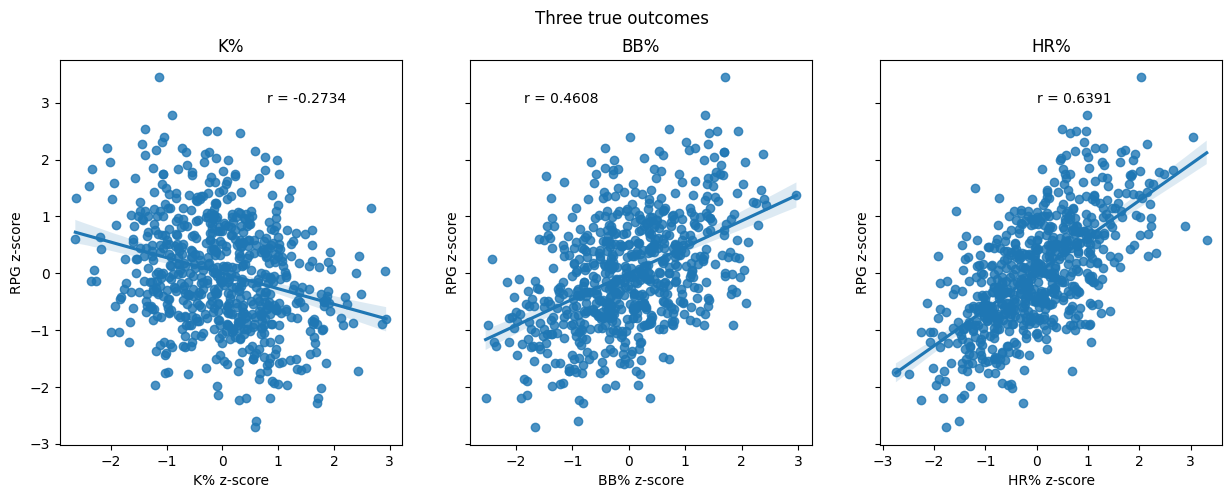

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Three true outcomes')

#K%
sns.regplot(ax=axes[0],data=norm_0224, x='K%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['K%'], y=norm_0224['RPG'])[0]
plt.text(-15, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('K% z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('K%')

#BB%
sns.regplot(ax=axes[1],data=norm_0224, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['BB%'], y=norm_0224['RPG'])[0]
plt.text(-10, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('BB% z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('BB%')

#HR%
sns.regplot(ax=axes[2],data=norm_0224, x='HR%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['HR%'], y=norm_0224['RPG'])[0]
plt.text(0, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('HR% z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('HR%')
plt.show()

The panels on the left and right encapsulate a main reason why the game has looked the way it has over the last two decades. The penalty for striking out more than average is rather weak, while the benefit for hitting more HRs than average is rather strong - not much weaker than the benefit for excelling in AVG. Combine this with the fact that the uppercut swing path that helps maximize HRs also increases how often hitters strike out, and you get a game environment where teams aren't afraid to strike out in pursuit of HRs.

(Is this unique to contemporary baseball? Is the correlation between K% and runs weakened by the idea that Ks aren't too harmful, resulting in good teams also racking up Ks, or today's power pitchers getting even the best hitters to strike out? Or does it reflect a fundamentally weaker relationship? In later analyses, we'll look at an earlier era of the sport to see if K% carried a heavier penalty back when the baseball world believed it carried a heavier one.)

---
Base stealing has also taken on less importance to modern teams, drawing similar ire among more "old-school" baseball fans as the decline in importance of AVG. The benefits of successfully stealing a base are obvious - turning a single or walk into a double, getting a runner on 2B to 3B so they can score on a sacrifice fly - and the threat of a runner stealing puts pressure on the pitcher and defense. However, a runner failing in their attempt to steal and getting out also comes with a strong penalty. Prior cost-benefit analysis of these factors indicates that succeeding in ~75% of attempts is the breakeven point.

Let's look at how excelling at stealing bases correlates with offensive excellence. We will look at base stealing in three ways, with the first two being raw stolen base count and stolen-base success rate. The third is a metric I term SBV (stolen base value), which measures how many successful steal attempts a team sits above or below the 75% success rate.

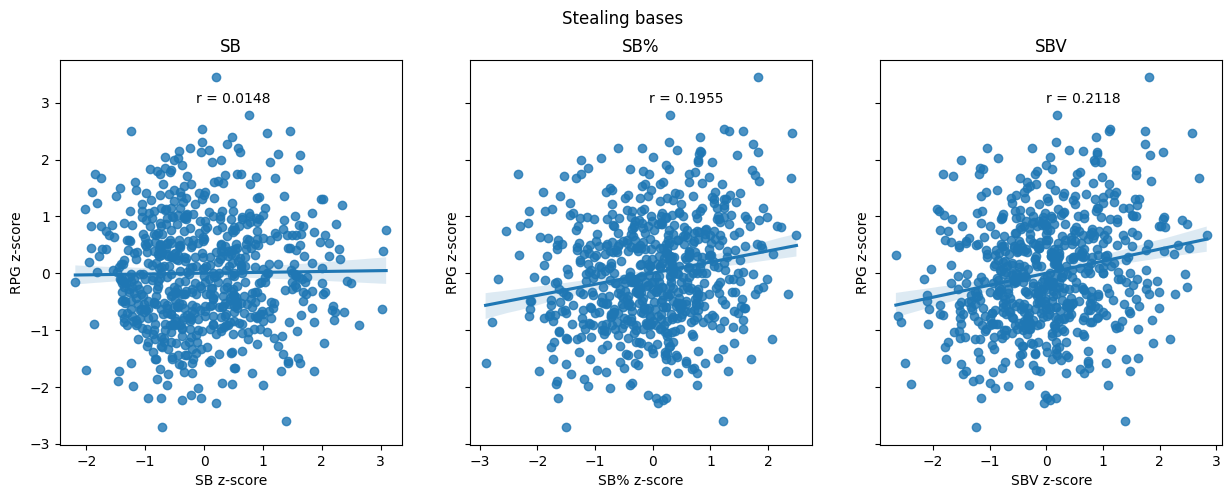

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Stealing bases')

#SB
sns.regplot(ax=axes[0],data=norm_0224, x='SB', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['SB'], y=norm_0224['RPG'])[0]
plt.text(-15, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('SB z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('SB')

#SB%
sns.regplot(ax=axes[1],data=norm_0224, x='SB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['SB%'], y=norm_0224['RPG'])[0]
plt.text(-7, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('SB% z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('SB%')

#SBV
sns.regplot(ax=axes[2],data=norm_0224, x='SBV', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['SBV'], y=norm_0224['RPG'])[0]
plt.text(0, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('SBV z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('SBV')
plt.show()

The correlation between raw stolen base z-score and run z-score is almost zero. Metrics that factor in how often stolen base attempts are successful certainly do better, but the correlations are still quite weak. Teams can be effective in scoring runs without putting too much emphasis on their base-stealing game.

---
Now let's look at BABIP - Batting Average on Balls In Play. As mentioned above, when a ball is put in play, the quality and choices of the defense play a role in determining the outcome. This leads some contemporary baseball thought to consider it something of statistical noise, since the exact same ball in play can have different outcomes depending on the behavior of the defense. While there is some element of "luck" to this, hitters do get some say in the matter by virtue of their speed (a faster runner gives the defense less time to get them out) and power (a soft ground ball is easier to field than a hard line drive).

How much does BABIP affect run scoring? Let's compare it with AVG and BB%.

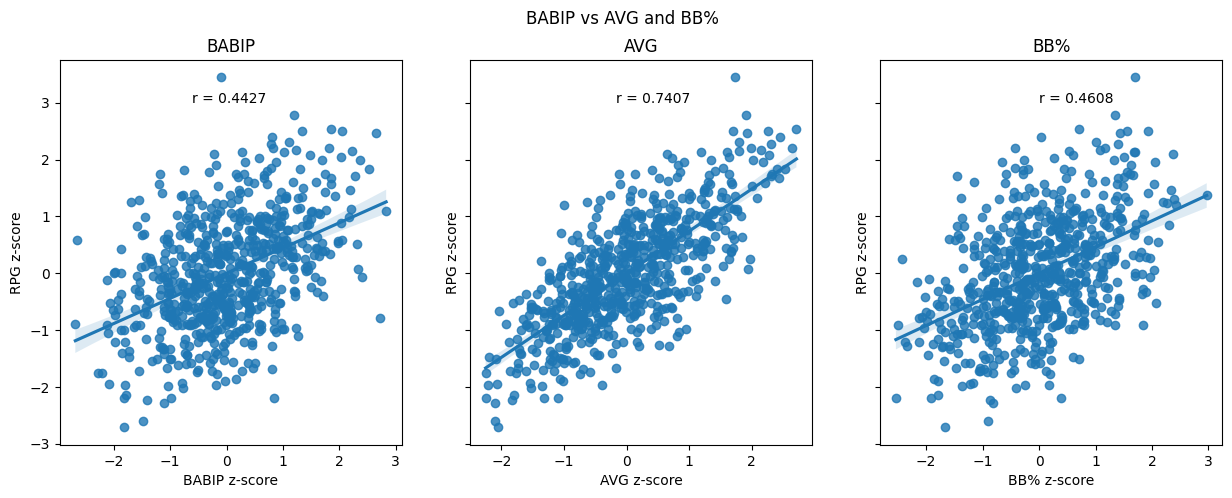

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('BABIP vs AVG and BB%')

#BABIP
sns.regplot(ax=axes[0],data=norm_0224, x='BABIP', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['BABIP'], y=norm_0224['RPG'])[0]
plt.text(-15, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('BABIP z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('BABIP')

#AVG
sns.regplot(ax=axes[1],data=norm_0224, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['AVG'], y=norm_0224['RPG'])[0]
plt.text(-7.5, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('AVG z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('AVG')

#BB%
sns.regplot(ax=axes[2],data=norm_0224, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['BB%'], y=norm_0224['RPG'])[0]
plt.text(0, 3, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('BB% z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('BB%')

plt.show()

BABIP has nearly the same correlation with run scoring as BB%!

This is a tough, but important, pill to swallow. Given how much of BABIP is dictated by factors outside a hitter's control, a significant element of offensive success is due to (from the perspective of the hitter) the luck of the defense a hitter is facing. A hitter can drill a line drive as hard as they'd like, but if it's hit right at a defender, it's still going to be an out.

#Pitchers, 2002-2024

Now let's look at 6 statistics for pitchers. Four of these are direct equivalents of offensive statistics - AVG, K%, BB%, HR%. WHIP is essentially the pitching equivalent of OBP, especially as we've treated OBP here as (AVG + BB%).

FIP is the "three true outcomes" (plus HBP) translated into a single statistic, weighted in a manner that historically has best predicted runs. As typically implemented, it includes a season-specific constant that makes a league-average FIP identical to a league-average ERA. Since all of our data are normalized to that season's average, such a constant will not affect our results, so I have not included it. As such, I refer to the statistic used here as "FIPa," for "approximate FIP."

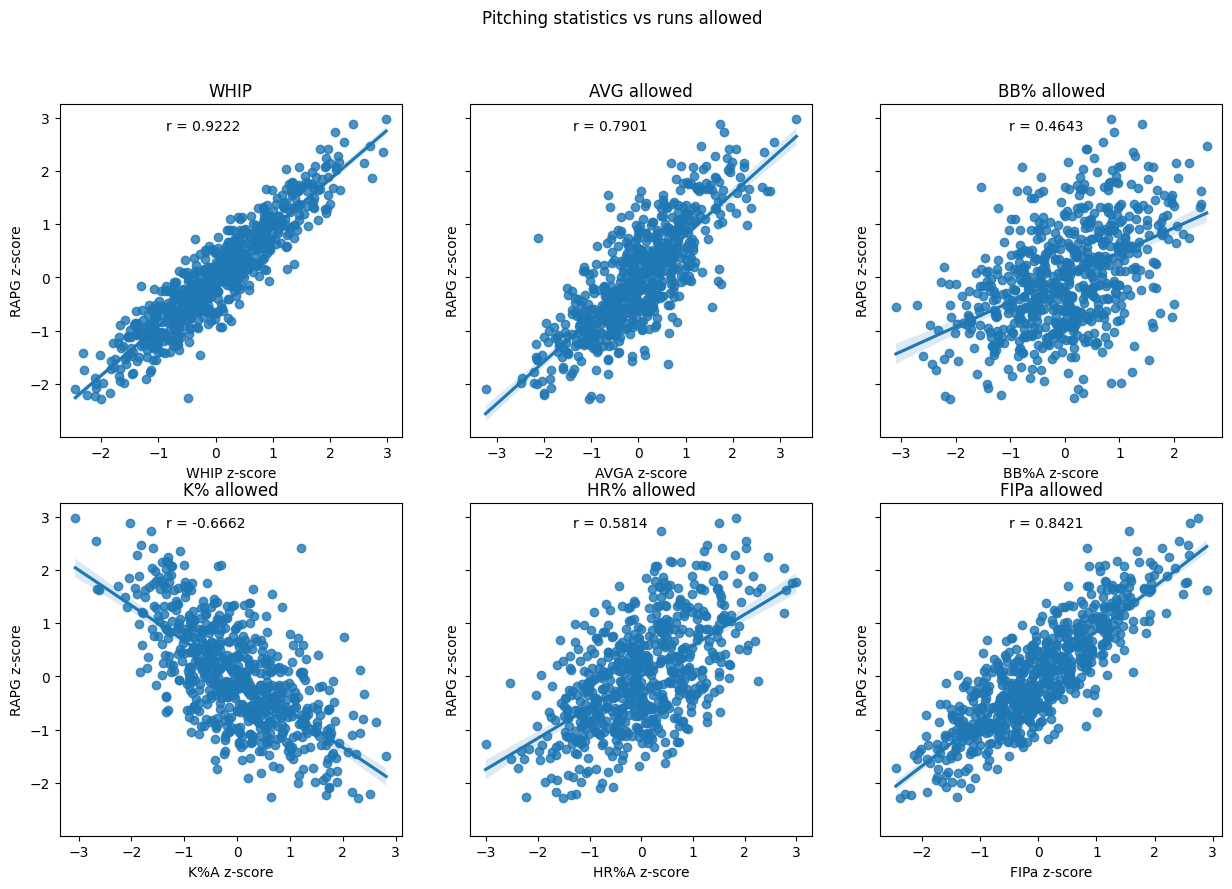

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,9.5), sharey=True)
fig.suptitle('Pitching statistics vs runs allowed')

#WHIP
sns.regplot(ax=axes[0,0],data=norm_0224, x='WHIP', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['WHIP'], y=norm_0224['RAPG'])[0]
plt.text(-15, 10.25, f'r = {str(round(r,4))}', fontsize=10)
axes[0,0].set_xlabel('WHIP z-score')
axes[0,0].set_ylabel('RAPG z-score')
axes[0,0].set_title('WHIP')

#AVGA
sns.regplot(ax=axes[0,1],data=norm_0224, x='AVGA', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['AVGA'], y=norm_0224['RAPG'])[0]
plt.text(-8, 10.25, f'r = {str(round(r,4))}', fontsize=10)
axes[0,1].set_xlabel('AVGA z-score')
axes[0,1].set_ylabel('RAPG z-score')
axes[0,1].set_title('AVG allowed')

#BB%A
sns.regplot(ax=axes[0,2],data=norm_0224, x='BB%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['BB%A'], y=norm_0224['RAPG'])[0]
plt.text(-0.5, 10.25, f'r = {str(round(r,4))}', fontsize=10)
axes[0,2].set_xlabel('BB%A z-score')
axes[0,2].set_ylabel('RAPG z-score')
axes[0,2].set_title('BB% allowed')

#K%A
sns.regplot(ax=axes[1,0],data=norm_0224, x='K%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['K%A'], y=norm_0224['RAPG'])[0]
plt.text(-15, 2.8, f'r = {str(round(r,4))}', fontsize=10)
axes[1,0].set_xlabel('K%A z-score')
axes[1,0].set_ylabel('RAPG z-score')
axes[1,0].set_title('K% allowed')

#HR%A
sns.regplot(ax=axes[1,1],data=norm_0224, x='HR%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['HR%A'], y=norm_0224['RAPG'])[0]
plt.text(-8, 2.8, f'r = {str(round(r,4))}', fontsize=10)
axes[1,1].set_xlabel('HR%A z-score')
axes[1,1].set_ylabel('RAPG z-score')
axes[1,1].set_title('HR% allowed')

#FIPa
sns.regplot(ax=axes[1,2],data=norm_0224, x='FIPa', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['FIPa'], y=norm_0224['RAPG'])[0]
plt.text(-0.5, 2.8, f'r = {str(round(r,4))}', fontsize=10)
axes[1,2].set_xlabel('FIPa z-score')
axes[1,2].set_ylabel('RAPG z-score')
axes[1,2].set_title('FIPa allowed')

plt.show()

As the pitcher's rough equivalent to OBP, perhaps it should be expected that WHIP z-score has such a strong correlation with RA z-score. What is surprising, given the relative importance of the two stats in contemporary baseball discourse, is that it has a stronger correlation than FIP z-score.

AVG, BB%, and HR% behave quite similarly for hitters and pitchers. K%, however, is radically different - its z-score is one of the stronger predictors of RA z-score, slightly ahead of HR% allowed, while on offense it has a fairly weak correlation with R z-score (r = -0.2734). This creates an asymmetry where pitchers have a strong incentive to strike hitters out, while hitters do not incur a strong penalty for striking out and do have a strong incentive to rack up Ks in the name of increasing HR%. I will explore why this asymmetry exists in the discussion.

#Modeling, 2002-2024

Now let's build some predictive models. Offensive stats will be used to predict runs scored, pitching stats will be used to predict runs allowed, and combinations will be used to predict wins.

Let's start with offense, beginning with the three true outcomes.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = norm_0224[['BB%','K%', 'HR%']].to_numpy()
y = norm_0224['RPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)


0.5638492199595728
[ 0.3000939  -0.38015656  0.60458107]


An r^2 of ~0.564 is a solid start. While it could be better, it's worth noting that emphasis on the "three true outcomes" is not about providing the most accurate prediction of overall performance - it's about looking at the elements of a hitter's game that are most within their control.

Now let's look at the conventional triple-slash line stats of AVG, OBP, and SLG.

In [ ]:
X = norm_0224[['AVG','OBP','SLG']].to_numpy()
y = norm_0224['RPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)


0.8826540639302942
[-0.01535483  0.40677035  0.61668389]


Capturing ~88.3% of variance in runs scored makes this a powerful model.

Because OBP and SLG both contain information from AVG, the model effectively only looks at OBP and SLG; the weights for AVG are near 0. This would suggest that performance doesn't suffer at all with just OBP and SLG, as indicated by Clemens's analysis, but let's confirm that it also holds true here.

In [ ]:
X = norm_0224[['OBP','SLG']].to_numpy()
y = norm_0224['RPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.882967637420237
[0.39786473 0.61254862]


Indeed, not weaker.

Now let's look at the triple-slash line I proposed: AVG, BB%, and ISO.

In [ ]:
X = norm_0224[['AVG','BB%','ISO']].to_numpy()
y = norm_0224['RPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.8805619243730177
[0.56298379 0.24916759 0.46783001]


At 88.1% of variance explained, this model's performance is nearly identical to the one trained on the traditional triple-slash line. Thus, the difference between AVG/OBP/SLG and AVG/BB%/ISO is not one of explanatory power, but one of how the data are presented.

I feel that AVG/BB%/ISO wins the clarity debate, given that it does not obfuscate walk and power information by combining them with AVG.

---
Now let's look at pitching. How well do rates of "three true outcomes" predict runs allowed?

In [ ]:
X = norm_0224[['BB%A','K%A','HR%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.6149600963318242
[ 0.29881232 -0.46523476  0.39679622]


A noticeable, though slight, improvement over how well their offensive equivalents predict runs scored.

How about WHIP and HR% as rough analogues to OBP and SLG?

In [ ]:
X = norm_0224[['WHIP','HR%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.8811949472771481
[0.8173032  0.23980902]


About as well as OBP and SLG predict runs scored - quite effectively.

Let's look at the rough equivalent to the proposed hitter triple-slash: AVG, BB%, and HR%.

In [ ]:
X = norm_0224[['AVGA','BB%A','HR%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.8449324729240734
[0.67260025 0.41135145 0.24669424]


The model performs slightly worse. Given that both WHIP and the combination of AVGA & BB%A look at hits and walks, this difference may be due to the fact that the denominators for these metrics are not identical; WHIP is per inning, whereas AVGA and BB%A are per batter faced.

What if we add K% to the WHIP and HR% model?

In [ ]:
X = norm_0224[['WHIP','HR%A','K%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

0.8796488440738969
[ 0.7882428   0.23820971 -0.04271465]


Model performance barely changes with folding in K%; if anything, it performs slightly worse.

This suggests that at least one out of WHIP and HR% contributes the same information to the model as K%. Intuition suggests WHIP, but let's verify this:

In [ ]:
X = norm_0224[['WHIP','K%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('WHIP & K% scores:')
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

X = norm_0224[['HR%A','K%A']].to_numpy()
y = norm_0224['RAPG'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('HR% & K% scores:')
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

WHIP & K% scores:
0.8401460551383607
[ 0.88204171 -0.05656694]
HR% & K% scores:
0.4905892475252309
[ 0.41928976 -0.52863435]


If a pitcher is highly successful in keeping runners off base, it doesn't matter much for their results whether runners are kept off via Ks or balls in play getting converted to outs. The converse isn't quite as strong - if a pitcher allows lots of baserunners, a high K% would suggest an abundance of less-damaging walks, while a low K% could be due to a greater number of hits, with the potential for extra bases and greater opportunities for baserunners to advance and score, a greater number of walks, or a combination of the two. In reality, though, WHIP and K% have a strong negative correlation, making high WHIP and high K% a rare combination:

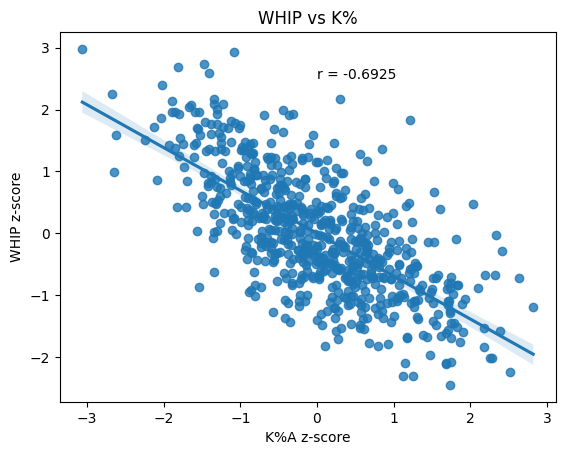

In [ ]:
sns.regplot(data=norm_0224, x='K%A', y='WHIP')
r = scipy.stats.pearsonr(x=norm_0224['K%A'], y=norm_0224['WHIP'])[0]
plt.text(0,2.5, f'r = {str(round(r,4))}', fontsize=10)
plt.xlabel('K%A z-score')
plt.ylabel('WHIP z-score')
plt.title('WHIP vs K%')
plt.show()

If K% doesn't contribute much to the model, why keep it in the proposed triple-slash?

While K% doesn't provide much additional information as to *what* a pitcher's results are in terms of runs allowed, it does tell us about *how* they achieve those results. Focus on the data around WHIP = -1 in the chart above. There's quite a wide swath of K% values in that band, and though the data skew towards higher K%, there are teams that are decidedly weak in racking up Ks while still keeping runners off base. Those would be teams that place an emphasis on pitching to weak contact, with strong defenses that readily convert those balls in play into outs. Pitching for Ks vs pitching to contact is an important stylistic distinction, and pitching for Ks tends to provide more reliable long-term success than pitching to contact, so it's valuable to provide insight into this at a glance.

---

Let's put the information from the two triple-slash lines together to see how well they predict wins, with a model trained on runs scored and runs allowed as a benchmark:

In [ ]:
X = norm_0224[['AVG', 'BB%', 'ISO', 'WHIP', 'HR%A', 'K%A']].to_numpy()
y = norm_0224['W%'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=72)

print('Triple-slash line model:')
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

X = stats_0224[['R', 'RA']].to_numpy()
y = stats_0224['W%'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Runs scored & allowed model:')
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test))
print(reg.coef_)

Triple-slash line model:
0.8236580614757599
[ 0.02465309  0.00775899  0.02022391 -0.04588578 -0.0111797  -0.0021351 ]
Runs scored & allowed model:
0.8671416537080203
[ 0.00059006 -0.00062213]


The model trained on the triple-slash lines is not all that far behind!

#What works in the playoffs?

Does what works for the regular season work for the playoffs? There are countless truisms about what wins championships, most of which are just picking one factor that's important in the regular season and elevating it to prime importance. Let's look a little more systematically.

In this section, we'll be looking at the World Series and League Championship Series, the final two rounds of the playoffs, from the full seasons ranging from 2002 to 2024.

In [ ]:
#Filter for LCS and World Series
df_0224 = df[(df['date']<20200000) | (df['date']>20210000)]
df_ch_0224 = df_0224[(df_0224['gametype']=='lcs') | (df_0224['gametype']=='worldseries')]
df_ch_0224

gid team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  \
4888    MIN200210080  ANA     0     0     1     0   0.0   0.0   0.0   0.0   
4889    MIN200210080  MIN     0     1     0     0   1.0   0.0   0.0   0.0   
4890    MIN200210090  ANA     1     3     0     0   0.0   2.0   0.0   0.0   
4891    MIN200210090  MIN     0     0     0     0   0.0   3.0   0.0   0.0   
4892    SLN200210090  SFN     1     4     1     0   1.0   2.0   0.0   0.0   
...              ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
110383  NYA202410280  NYA     0     0     0     0   0.0   0.0   0.0   0.0   
110384  NYA202410290  LAN     2     0     0     0   2.0   0.0   0.0   0.0   
110385  NYA202410290  NYA     0     1     4     0   0.0   1.0   0.0   5.0   
110386  NYA202410300  LAN     0     0     0     0   5.0   0.0   0.0   2.0   
110387  NYA202410300  NYA     3     1     1     0   0.0   1.0   0.0   0.0   

        ...  number   site  vishome  opp  win  loss  tie     gametype  box  \
4888    ...       0  MIN03        v  MIN    0     1    0          lcs    y   
4889    ...       0  MIN03        h  ANA    1     0    0          lcs    y   
4890    ...       0  MIN03        v  MIN    1     0    0          lcs    y   
4891    ...       0  MIN03        h  ANA    0     1    0          lcs    y   
4892    ...       0  STL09        v  SLN    1     0    0          lcs    y   
...     ...     ...    ...      ...  ...  ...   ...  ...          ...  ...   
110383  ...       0  NYC21        h  LAN    0     1    0  worldseries    y   
110384  ...       0  NYC21        v  NYA    0     1    0  worldseries    y   
110385  ...       0  NYC21        h  LAN    1     0    0  worldseries    y   
110386  ...       0  NYC21        v  NYA    1     0    0  worldseries    y   
110387  ...       0  NYC21        h  LAN    0     1    0  worldseries    y   

        pbp  
4888      y  
4889      y  
4890      y  
4891      y  
4892      y  
...     ...  
110383    y  
110384    y  
110385    y  
110386    y  
110387    y  

[748 rows x 111 columns]

Most columns here contain information we don't need. Let's first rename the columns we want to preserve. Columns are named with respect to batter or pitcher; most pitcher variables will be specified with A (for allowed), most unspecified stat columns will be for batters. The exception to this is ER (a stat that typically only exists for pitchers).

In [ ]:
df_ch_0224 = df_ch_0224.rename(columns={'gid': 'Game ID', 'team': 'Team', 'lob': 'LOB', 'b_pa': 'PA', 'b_ab': 'AB', 'b_r': 'R', 'b_h': 'H',
                        'b_d': '2B', 'b_t': '3B','b_hr': 'HR', 'b_rbi': 'RBI', 'b_sh': 'SH', 'b_sf': 'SF', 'b_hbp': 'HBP',
                        'b_w': 'BB', 'b_iw': 'IBB', 'b_k': 'K', 'b_sb': 'SB', 'b_cs': 'CS', 'b_gdp': 'GIDP',
                        'p_ipouts': 'Pitcher Outs', 'p_bfp': 'BF', 'p_h': 'HA', 'p_d': '2BA', 'p_t': '3BA', 'p_hr': 'HRA',
                        'p_r': 'RA', 'p_er': 'ER', 'p_w': 'BBA', 'p_iw': 'IBBA', 'p_k': 'KA', 'p_hbp': 'HBPA',
                        'p_sh': 'SHA', 'p_sf': 'SFA', 'd_sb': 'SBA', 'd_cs': 'CSA', 'date': 'Date', 'win': 'W',
                        'loss': 'L'})
df_ch_0224.head()

Game ID Team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
4888  MIN200210080  ANA     0     0     1     0   0.0   0.0   0.0   0.0  ...   
4889  MIN200210080  MIN     0     1     0     0   1.0   0.0   0.0   0.0  ...   
4890  MIN200210090  ANA     1     3     0     0   0.0   2.0   0.0   0.0  ...   
4891  MIN200210090  MIN     0     0     0     0   0.0   3.0   0.0   0.0  ...   
4892  SLN200210090  SFN     1     4     1     0   1.0   2.0   0.0   0.0  ...   

      number   site  vishome  opp  W  L  tie  gametype  box  pbp  
4888       0  MIN03        v  MIN  0  1    0       lcs    y    y  
4889       0  MIN03        h  ANA  1  0    0       lcs    y    y  
4890       0  MIN03        v  MIN  1  0    0       lcs    y    y  
4891       0  MIN03        h  ANA  0  1    0       lcs    y    y  
4892       0  STL09        v  SLN  1  0    0       lcs    y    y  

[5 rows x 111 columns]

In [ ]:
#Now let's limit the data frame to the metrics we will explore.

df_ch_0224 = df_ch_0224[['Game ID', 'Team', 'Date', 'W', 'L', 'LOB', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SH', 'SF', 'HBP', 'BB', 'IBB', 'K',
          'SB', 'CS', 'GIDP', 'Pitcher Outs', 'BF','HA', '2BA', '3BA', 'HRA', 'RA', 'ER', 'BBA', 'IBBA', 'KA', 'HBPA',
          'SHA', 'SFA', 'SBA', 'CSA']]
df_ch_0224.head()


Game ID Team      Date  W  L  LOB  PA  AB  R   H  ...  RA  ER  BBA  \
4888  MIN200210080  ANA  20021008  0  1    4  32  31  1   4  ...   2   2    3   
4889  MIN200210080  MIN  20021008  1  0    7  33  27  2   5  ...   1   0    1   
4890  MIN200210090  ANA  20021009  1  0    6  39  38  6  10  ...   3   3    2   
4891  MIN200210090  MIN  20021009  0  1    7  37  35  3  11  ...   6   6    1   
4892  SLN200210090  SFN  20021009  1  0    6  42  36  9  11  ...   6   6    4   

      IBBA  KA  HBPA  SHA  SFA  SBA  CSA  
4888     0   6     1    1    1    0    0  
4889     0   5     0    0    0    0    0  
4890     0  10     0    0    0    0    0  
4891     0   6     0    0    0    0    1  
4892     0   4     1    1    0    0    1  

[5 rows x 39 columns]

In [ ]:
#We need to create a season column based on the date.
df_ch_0224['Season'] = df_ch_0224['Date'].astype(str).str.slice(0,4)
df_ch_0224['Season'] = df_ch_0224['Season'].astype(int)
df_ch_0224['Season'].tail()

110383    2024
110384    2024
110385    2024
110386    2024
110387    2024
Name: Season, dtype: int64

In [ ]:
#Now let's assemble the stats.

#Get column names
columns = df_ch_0224.columns.to_list()
#Omit non-statistic columns
metrics = columns[2:]
metrics.remove('Date')
metrics.remove('Season')
metrics
years = df_ch_0224['Season'].unique()
years

stats_ch_0224 = pd.DataFrame()
for year in years:
  #Concatenate together into a single dataframe of teams, seasons,
  season_stats = pd.DataFrame()
  for metric in metrics:
    season_stats[metric] = df_ch_0224[df_ch_0224['Season']==year].groupby('Team')[metric].sum()
  stats_ch_0224 = pd.concat([stats_ch_0224, season_stats])
stats_ch_0224 = stats_ch_0224.reset_index()


stats_ch_0224

Team  W  L  LOB   PA   AB   R    H  2B  3B  ...  RA  ER  BBA  IBBA  KA  \
0   ANA  8  4   83  459  416  70  125  20   3  ...  56  51   37     9  88   
1   MIN  1  4   28  172  160  12   37   9   0  ...  29  28    9     1  26   
2   SFN  7  5   85  466  393  67  105  10   3  ...  57  53   33     5  61   
3   SLN  1  4   39  190  171  16   44   8   0  ...  23  23   21     5  36   
4   BOS  3  4   49  270  250  29   68   9   2  ...  30  28   21     2  49   
..  ... .. ..  ...  ...  ...  ..  ...  ..  ..  ...  ..  ..  ...   ...  ..   
83  TEX  8  4   73  466  419  65   99  14   2  ...  55  55   44     3  88   
84  CLE  1  4   47  207  178  20   43  10   0  ...  29  23   22     3  49   
85  LAN  8  3   86  447  369  71   89  14   2  ...  50  50   55     4  92   
86  NYA  5  5   75  398  338  53   78  14   0  ...  45  39   45     3  81   
87  NYN  2  4   56  241  203  26   53   6   2  ...  46  41   42     0  51   

    HBPA  SHA  SFA  SBA  CSA  
0      2    6    6    6    2  
1      2    2    0    1    2  
2      4    7    5    7    1  
3      3    8    2    1    0  
4      4    0    1    5    1  
..   ...  ...  ...  ...  ...  
83     4    5    4   10    1  
84     2    1    3    2    2  
85    11    0    4   10    0  
86     3    2    6    8    2  
87     3    3    2    6    1  

[88 rows x 37 columns]

Let's generate some common statistics from this table. Note that we will be working directly from this table, rather than normalizing like in the previous section. This is due to the sample size being so small for each year, as well as only looking at 4 teams. When we eventually compare these stats with the regular season's, we will look at the pre-normalization statistics for those regular seasons.

In [ ]:
#Batting Average
stats_ch_0224['AVG'] = stats_ch_0224['H']/stats_ch_0224['AB']

#OBP
stats_ch_0224['OBP'] = (stats_ch_0224['H']+stats_ch_0224['BB']+stats_ch_0224['HBP'])/(stats_ch_0224['AB']+stats_ch_0224['BB']+stats_ch_0224['HBP']+stats_ch_0224['SF'])

#Singles
stats_ch_0224['1B'] = stats_ch_0224['H']-(stats_ch_0224['2B']+stats_ch_0224['3B']+stats_ch_0224['HR'])

#SLG
stats_ch_0224['SLG'] = (stats_ch_0224['1B']+2*stats_ch_0224['2B']+3*stats_ch_0224['3B']+4*stats_ch_0224['HR'])/stats_ch_0224['AB']

#ISO
stats_ch_0224['ISO'] = stats_ch_0224['SLG']-stats_ch_0224['AVG']

#BB%
stats_ch_0224['BB%'] = stats_ch_0224['BB']/stats_ch_0224['PA']

#K%
stats_ch_0224['K%'] = stats_ch_0224['K']/stats_ch_0224['PA']

#LOBa, approximate LOB%
stats_ch_0224['LOBa'] = stats_ch_0224['LOB']/(stats_ch_0224['H']+stats_ch_0224['BB']+stats_ch_0224['HBP']-stats_ch_0224['HR'])*100

#HR%
stats_ch_0224['HR%'] = stats_ch_0224['HR']/stats_ch_0224['PA']

#BABIP
stats_ch_0224['BABIP'] = (stats_ch_0224['H']-stats_ch_0224['HR'])/(stats_ch_0224['AB'] - stats_ch_0224['K']
                                                          - stats_ch_0224['HR'] + stats_ch_0224['SF'])

#SB%
stats_ch_0224['SB%'] = stats_ch_0224['SB']/(stats_ch_0224['SB']+stats_ch_0224['CS'])

#SBV, which calculates how many steals/caught stealing attempts the team is over/under the SB:CS ratio for being
#a net positive (novel)

stats_ch_0224['SBV'] = stats_ch_0224['SB']-3*stats_ch_0224['CS']

#IP
stats_ch_0224['IP']= stats_ch_0224['Pitcher Outs']/3

#ERA
stats_ch_0224['ERA']= stats_ch_0224['ER']/stats_ch_0224['IP']*9

#FIPa, which lacks the constant that brings it in line with ERA (semi-novel)
stats_ch_0224['FIPa'] = (13*stats_ch_0224['HRA'] + 3*(stats_ch_0224['BBA'] + stats_ch_0224['HBPA']) - 2*stats_ch_0224['KA'])/stats_ch_0224['IP']

#FIPh, which measures the FIP (with PA as the denominator) of the collective pitching a team's hitters have faced (novel)
stats_ch_0224['FIPh'] = (13*stats_ch_0224['HR'] + 3*(stats_ch_0224['BB'] + stats_ch_0224['HBP']) - 2*stats_ch_0224['K'])/stats_ch_0224['PA']

#2B%, the percentage of PAs resulting in a 2B
stats_ch_0224['2B%'] = stats_ch_0224['2B']/stats_ch_0224['PA']*100

#AVGA, AVG against pitching staff
stats_ch_0224['AVGA']= stats_ch_0224['HA']/stats_ch_0224['BF']

#WHIP, walks and hits per IP
stats_ch_0224['WHIP'] = (stats_ch_0224['HA']+stats_ch_0224['BBA'])/stats_ch_0224['IP']

#BB%A, BB% for pitchers
stats_ch_0224['BB%A']= stats_ch_0224['BBA']/stats_ch_0224['BF']*100

#K%A, K% for pitchers
stats_ch_0224['K%A']= stats_ch_0224['KA']/stats_ch_0224['BF']*100

#HR%A, HR% for pitchers
stats_ch_0224['HR%A']= stats_ch_0224['HRA']/stats_ch_0224['BF']*100

#Winning percentage
stats_ch_0224['W%'] = stats_ch_0224['W']/(stats_ch_0224['W']+stats_ch_0224['L'])

#Runs per game
stats_ch_0224['RPG'] = stats_ch_0224['R']/(stats_ch_0224['W']+stats_ch_0224['L'])

#Runs allowed per game
stats_ch_0224['RAPG'] = stats_ch_0224['RA']/(stats_ch_0224['W']+stats_ch_0224['L'])

In [ ]:
#Make Pandas series of each season repeated 4 times to add onto chart
seasons = pd.Series(years)
seasons = seasons.repeat(4).reset_index(drop=True)
stats_ch_0224['Season'] = seasons

stats_ch_0224

Team  W  L  LOB   PA   AB   R    H  2B  3B  ...       2B%      AVGA  \
0   ANA  8  4   83  459  416  70  125  20   3  ...  4.357298  0.230942   
1   MIN  1  4   28  172  160  12   37   9   0  ...  5.232558  0.266304   
2   SFN  7  5   85  466  393  67  105  10   3  ...  2.145923  0.258065   
3   SLN  1  4   39  190  171  16   44   8   0  ...  4.210526  0.203125   
4   BOS  3  4   49  270  250  29   68   9   2  ...  3.333333  0.204545   
..  ... .. ..  ...  ...  ...  ..  ...  ..  ..  ...       ...       ...   
83  TEX  8  4   73  466  419  65   99  14   2  ...  3.004292  0.225738   
84  CLE  1  4   47  207  178  20   43  10   0  ...  4.830918  0.214286   
85  LAN  8  3   86  447  369  71   89  14   2  ...  3.131991  0.200903   
86  NYA  5  5   75  398  338  53   78  14   0  ...  3.517588  0.192405   
87  NYN  2  4   56  241  203  26   53   6   2  ...  2.489627  0.216216   

        WHIP       BB%A        K%A      HR%A        W%       RPG      RAPG  \
0   1.333333   8.295964  19.730942  3.139013  0.666667  5.833333  4.666667   
1   1.380952   4.891304  14.130435  4.347826  0.200000  2.400000  5.800000   
2   1.457143   7.096774  13.118280  3.010753  0.583333  5.583333  4.750000   
3   1.374046  10.937500  18.750000  3.645833  0.200000  3.200000  4.600000   
4   1.190476   7.954545  18.560606  3.030303  0.428571  4.142857  4.285714   
..       ...        ...        ...       ...       ...       ...       ...   
83  1.372727   9.282700  18.565401  2.742616  0.666667  5.416667  4.583333   
84  1.422222  11.224490  25.000000  5.102041  0.200000  4.000000  5.800000   
85  1.469388  12.415350  20.767494  3.160271  0.727273  6.454545  4.545455   
86  1.324818  11.392405  20.506329  3.037975  0.500000  5.300000  4.500000   
87  1.884615  16.216216  19.691120  4.247104  0.333333  4.333333  7.666667   

    Season  
0     2002  
1     2002  
2     2002  
3     2002  
4     2003  
..     ...  
83    2023  
84    2024  
85    2024  
86    2024  
87    2024  

[88 rows x 63 columns]

To keep in mind which teams may catch our eyes when looking at the charts, let's look at the top 10 teams for runs scored and allowed per game:

In [ ]:
sort = stats_ch_0224.sort_values(by=['RPG'], ascending=False).head(10)
sort[['Team', 'W', 'L', 'Season']]

Team  W  L  Season
21  BOS  8  3    2007
85  LAN  8  3    2024
10  NYA  3  4    2004
38  SLN  8  5    2011
5   CHN  3  4    2003
53  KCA  8  3    2015
8   BOS  8  3    2004
0   ANA  8  4    2002
64  BOS  8  2    2018
31  PHI  6  5    2009

3 of the top 10 teams did not win the World Series; the 2004 Yankees and 2003 Cubs did not even reach the World Series.

In [ ]:
sort = stats_ch_0224.sort_values(by=['RAPG']).head(10)
sort[['Team', 'W', 'L', 'Season']]

Team  W  L  Season
42  SFN  8  3    2012
59  TOR  1  4    2016
44  BOS  8  4    2013
76  HOU  8  2    2022
40  DET  4  4    2012
13  CHA  8  1    2005
63  NYA  3  4    2017
34  SFN  8  3    2010
57  CLE  7  5    2016
82  PHI  3  4    2023

Only half of these teams won the World Series, with 3 not reaching the World Series. (Strange as they may look, the numbers for the 2012 Tigers are not a mistake; they swept the Yankees, then got swept by the list-leading Giants, giving them a 4-4 record.)

Let's revisit the analyses we did before, using data from the LCS and World Series.

Starting with the conventional triple-slash line:

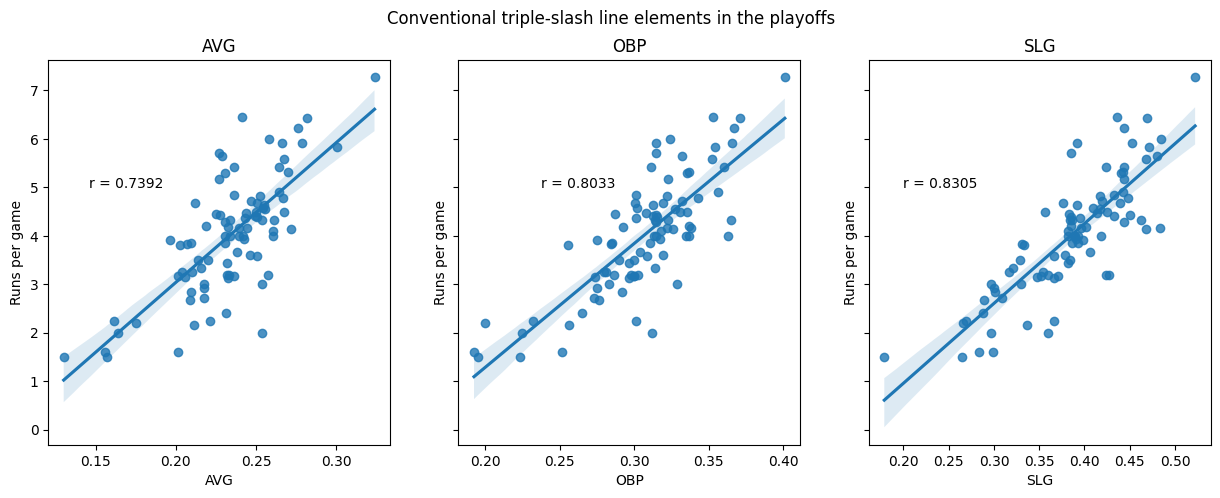

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Conventional triple-slash line elements in the playoffs')

#Plot AVG
sns.regplot(ax=axes[0],data=stats_ch_0224, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['AVG'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.7, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_ylabel('Runs per game')
axes[0].set_title('AVG')

#Plot OBP
sns.regplot(ax=axes[1],data=stats_ch_0224, x='OBP', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['OBP'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.2, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_ylabel('Runs per game')
axes[1].set_title('OBP')

#Plot SLG
sns.regplot(ax=axes[2],data=stats_ch_0224, x='SLG', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['SLG'], y=stats_ch_0224['RPG'])[0]
plt.text(0.2, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_ylabel('Runs per game')
axes[2].set_title('SLG')
plt.show()

Though the correlations are weaker, it's not by all that much.

Next, the proposed triple-slash line components AVG, BB%, and ISO:

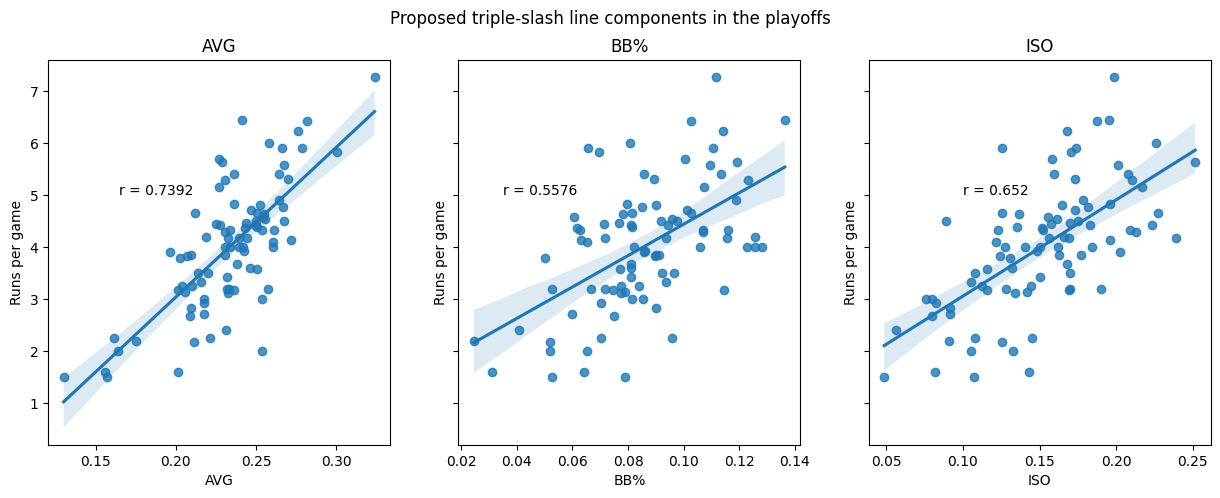

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Proposed triple-slash line components in the playoffs')

#Plot AVG
sns.regplot(ax=axes[0],data=stats_ch_0224, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['AVG'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.45, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_ylabel('Runs per game')
axes[0].set_title('AVG')

#Plot BB%
sns.regplot(ax=axes[1],data=stats_ch_0224, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['BB%'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.2, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_ylabel('Runs per game')
axes[1].set_title('BB%')

#Plot ISO
sns.regplot(ax=axes[2],data=stats_ch_0224, x='ISO', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['ISO'], y=stats_ch_0224['RPG'])[0]
plt.text(0.1, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_ylabel('Runs per game')
axes[2].set_title('ISO')
plt.show()

Nothing too dissimilar for the metrics involving hits, though ISO takes a larger hit than AVG. BB% takes on a bit more importance.

Three true outcomes:

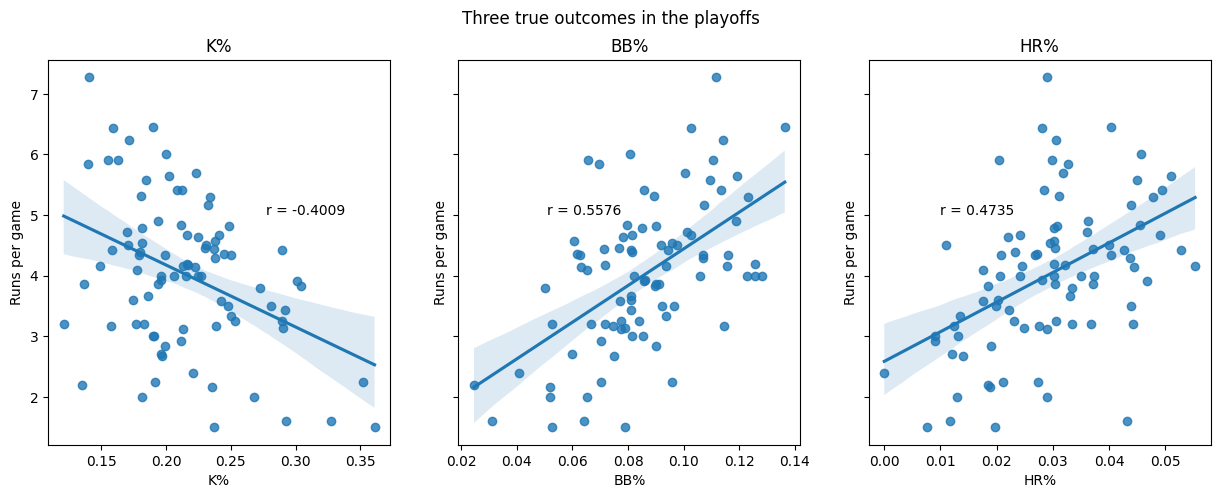

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Three true outcomes in the playoffs')

#Plot K%
sns.regplot(ax=axes[0],data=stats_ch_0224, x='K%', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['K%'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.11, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_ylabel('Runs per game')
axes[0].set_title('K%')

#Plot BB%
sns.regplot(ax=axes[1],data=stats_ch_0224, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['BB%'], y=stats_ch_0224['RPG'])[0]
plt.text(-0.06, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_ylabel('Runs per game')
axes[1].set_title('BB%')

#Plot HR%
sns.regplot(ax=axes[2],data=stats_ch_0224, x='HR%', y='RPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['HR%'], y=stats_ch_0224['RPG'])[0]
plt.text(0.01, 5, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_ylabel('Runs per game')
axes[2].set_title('HR%')
plt.show()

K% and BB% take on somewhat greater importance in the playoffs, while HRs don't have quite the same impact (r = 0.6391 for regular-season HR% z-score vs regular-season runs z-score). While this doesn't outright negate contemporary thinking about the importance of HRs in the playoffs - for example, it is still harder to string together several hits against elite pitching than it is to hit a HR - the gulf between "importance of AVG" and "importance of HR%" widens in the playoffs.

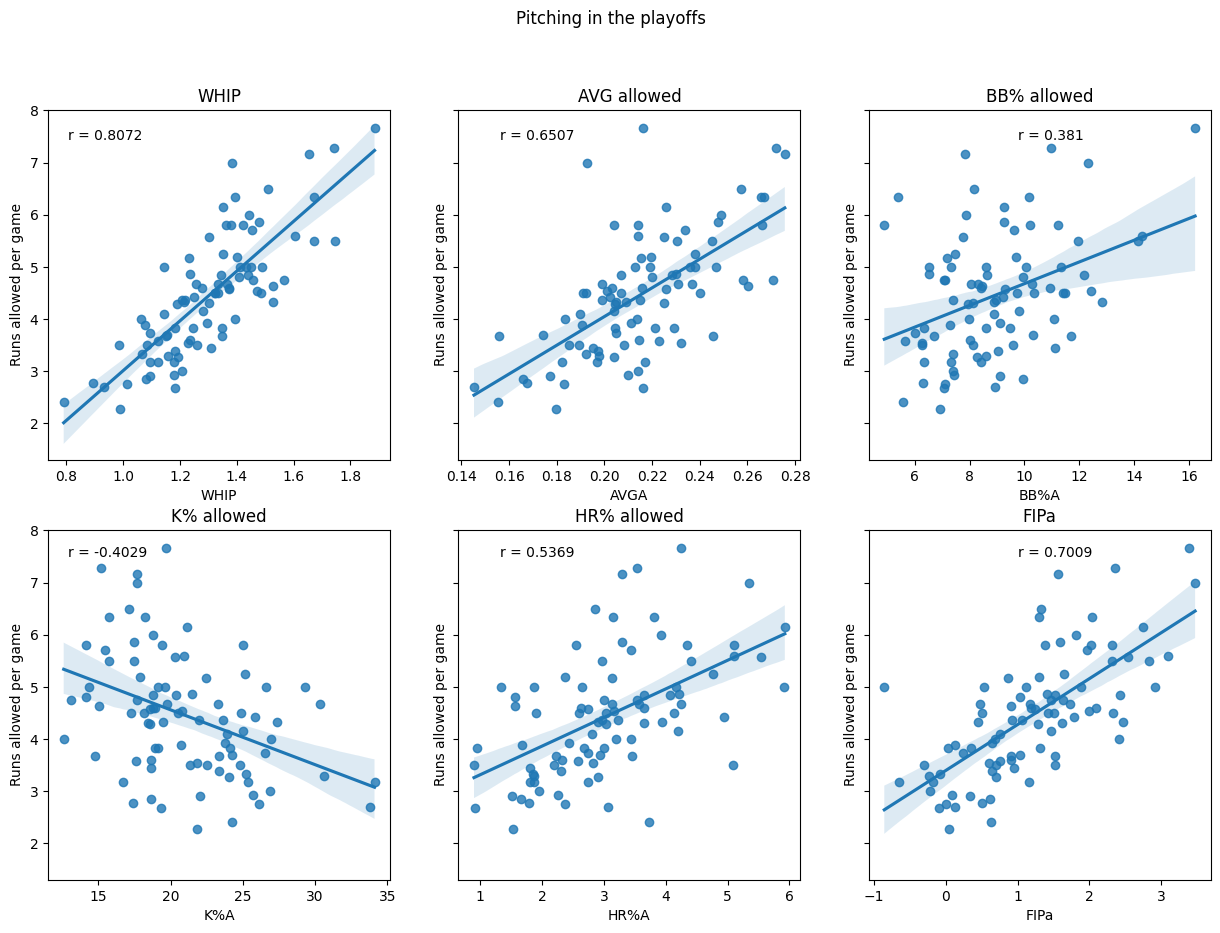

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=True)
fig.suptitle('Pitching in the playoffs')

#Plot WHIP
sns.regplot(ax=axes[0,0],data=stats_ch_0224, x='WHIP', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['WHIP'], y=stats_ch_0224['RAPG'])[0]
plt.text(-12.2, 15.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,0].set_ylabel('Runs allowed per game')
axes[0,0].set_title('WHIP')

#Plot AVGA
sns.regplot(ax=axes[0,1],data=stats_ch_0224, x='AVGA', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['AVGA'], y=stats_ch_0224['RAPG'])[0]
plt.text(-6.2, 15.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,1].set_ylabel('Runs allowed per game')
axes[0,1].set_title('AVG allowed')

#Plot BB%A
sns.regplot(ax=axes[0,2],data=stats_ch_0224, x='BB%A', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['BB%A'], y=stats_ch_0224['RAPG'])[0]
plt.text(1, 15.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,2].set_ylabel('Runs allowed per game')
axes[0,2].set_title('BB% allowed')

#Plot K%
sns.regplot(ax=axes[1,0],data=stats_ch_0224, x='K%A', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['K%A'], y=stats_ch_0224['RAPG'])[0]
plt.text(-12.2, 7.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1,0].set_ylabel('Runs allowed per game')
axes[1,0].set_title('K% allowed')

#Plot HR%A
sns.regplot(ax=axes[1,1],data=stats_ch_0224, x='HR%A', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['HR%A'], y=stats_ch_0224['RAPG'])[0]
plt.text(-6.2, 7.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1,1].set_ylabel('Runs allowed per game')
axes[1,1].set_title('HR% allowed')

#Plot FIP
sns.regplot(ax=axes[1,2],data=stats_ch_0224, x='FIPa', y='RAPG')
r = scipy.stats.pearsonr(x=stats_ch_0224['FIPa'], y=stats_ch_0224['RAPG'])[0]
plt.text(1, 7.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1,2].set_ylabel('Runs allowed per game')
axes[1,2].set_title('FIPa')

plt.show()

Generally speaking, these statistics maintain their relative importance in the playoffs, though all show weaker correlations than their regular-season counterparts. K% takes a more drastic dip (r = -0.6662 for the regular season); for K% and BB%, this lowered correlation appears to be due to a fairly wide range of runs allowed at the lower end of the spectrum for each metric.

---
#How readily does regular season performance translate to playoff performance?

In the minds of many fans, "the World Series winner" is synonymous with "the best team," under the belief that the best team will win the World Series. The smaller sample size of the playoffs is not of great concern to these fans; if you're the best, you can hang tough and win when it matters most against the best teams.

As a proxy for this idea, let's compare how teams in the playoffs perform on various metrics with how they performed during the corresponding regular season.

In [ ]:
#Building subset of stats_0224 for just the LCS teams
sub_stats_ch_0224 = pd.concat([stats_ch_0224['Team'], stats_ch_0224.loc[:,'AVG':'Season']], axis=1)
sub_stats_ch_0224

Team       AVG       OBP  1B       SLG       ISO       BB%        K%  \
0   ANA  0.300481  0.353846  87  0.471154  0.170673  0.069717  0.139434   
1   MIN  0.231250  0.264706  28  0.287500  0.056250  0.040698  0.220930   
2   SFN  0.267176  0.352423  71  0.468193  0.201018  0.109442  0.184549   
3   SLN  0.257310  0.302703  29  0.426901  0.169591  0.052632  0.121053   
4   BOS  0.272000  0.325926  45  0.468000  0.196000  0.062963  0.222222   
..  ...       ...       ...  ..       ...       ...       ...       ...   
83  TEX  0.236277  0.311159  60  0.443914  0.207637  0.085837  0.212446   
84  CLE  0.241573  0.334951  28  0.382022  0.140449  0.125604  0.227053   
85  LAN  0.241192  0.352941  55  0.436314  0.195122  0.136465  0.190157   
86  NYA  0.230769  0.335013  45  0.440828  0.210059  0.123116  0.233668   
87  NYN  0.261084  0.365145  40  0.384236  0.123153  0.116183  0.199170   

         LOBa       HR%  ...       2B%      AVGA      WHIP       BB%A  \
0   56.849315  0.032680  ...  4.357298  0.230942  1.333333   8.295964   
1   62.222222  0.000000  ...  5.232558  0.266304  1.380952   4.891304   
2   61.151079  0.045064  ...  2.145923  0.258065  1.457143   7.096774   
3   79.591837  0.036842  ...  4.210526  0.203125  1.374046  10.937500   
4   64.473684  0.044444  ...  3.333333  0.204545  1.190476   7.954545   
..        ...       ...  ...       ...       ...       ...        ...   
83  59.836066  0.049356  ...  3.004292  0.225738  1.372727   9.282700   
84  73.437500  0.024155  ...  4.830918  0.214286  1.422222  11.224490   
85  62.318841  0.040268  ...  3.131991  0.200903  1.469388  12.415350   
86  65.789474  0.047739  ...  3.517588  0.192405  1.324818  11.392405   
87  67.469880  0.020747  ...  2.489627  0.216216  1.884615  16.216216   

          K%A      HR%A        W%       RPG      RAPG  Season  
0   19.730942  3.139013  0.666667  5.833333  4.666667    2002  
1   14.130435  4.347826  0.200000  2.400000  5.800000    2002  
2   13.118280  3.010753  0.583333  5.583333  4.750000    2002  
3   18.750000  3.645833  0.200000  3.200000  4.600000    2002  
4   18.560606  3.030303  0.428571  4.142857  4.285714    2003  
..        ...       ...       ...       ...       ...     ...  
83  18.565401  2.742616  0.666667  5.416667  4.583333    2023  
84  25.000000  5.102041  0.200000  4.000000  5.800000    2024  
85  20.767494  3.160271  0.727273  6.454545  4.545455    2024  
86  20.506329  3.037975  0.500000  5.300000  4.500000    2024  
87  19.691120  4.247104  0.333333  4.333333  7.666667    2024  

[88 rows x 27 columns]

In [ ]:
stats_of_ch_0224 = pd.DataFrame()
for year in years:
  ch_list = stats_ch_0224[stats_ch_0224['Season']==year]['Team'].to_list()
  for team in ch_list:
    stats_of_ch_0224 = pd.concat([stats_of_ch_0224, stats_0224[(stats_0224['Team']==team) & (stats_0224['Season']==year)]])
stats_of_ch_0224

Team   W   L   LOB    PA    AB    R     H   2B  3B  ...      AVGA  \
0    ANA  99  63  1165  6327  5678  851  1603  333  32  ...  0.220600   
16   MIN  94  67  1124  6196  5582  768  1518  348  36  ...  0.237078   
25   SFN  95  66  1241  6298  5497  783  1465  300  35  ...  0.222754   
26   SLN  97  65  1160  6246  5505  787  1475  285  26  ...  0.220864   
34   BOS  95  67  1224  6530  5769  961  1667  371  40  ...  0.236507   
..   ...  ..  ..   ...   ...   ...  ...   ...  ...  ..  ...       ...   
627  TEX  90  72  1148  6306  5595  881  1470  326  18  ...  0.220747   
638  CLE  92  69   961  5927  5310  708  1263  245  18  ...  0.206652   
643  LAN  98  64  1122  6255  5522  842  1423  291  26  ...  0.210518   
647  NYA  94  68  1117  6245  5450  815  1352  243  15  ...  0.207470   
648  NYN  89  73  1089  6166  5510  768  1357  279  15  ...  0.202033   

         WHIP      BB%A        K%A      HR%A          PR       RPG      RAPG  \
0    1.276566  8.348368  16.385107  2.771855  103.008825  5.253086  3.975309   
16   1.310337  7.157998  16.729170  3.000163   86.583183  4.770186  4.422360   
25   1.302412  8.636063  16.380449  1.915456   99.448719  4.863354  3.826087   
26   1.315050  8.916055  16.446618  2.298289   96.546122  4.858025  4.000000   
34   1.359354  7.678993  17.954367  2.407553   94.810021  5.932099  4.993827   
..        ...       ...        ...       ...         ...       ...       ...   
627  1.267812  8.149378  22.423237  3.286307   97.560850  5.438272  4.419753   
638  1.201681  8.306601  23.805504  3.022117   90.994530  4.397516  3.857143   
643  1.227116  8.285100  22.986605  3.274351   97.368653  5.197531  4.234568   
647  1.242542  8.693525  23.764476  2.952210   96.901749  5.030864  4.123457   
648  1.260458  9.609708  23.860282  2.705805   88.832797  4.740741  4.302469   

           W%  Season  
0    0.611111    2002  
16   0.583851    2002  
25   0.590062    2002  
26   0.598765    2002  
34   0.586420    2003  
..        ...     ...  
627  0.555556    2023  
638  0.571429    2024  
643  0.604938    2024  
647  0.580247    2024  
648  0.549383    2024  

[88 rows x 64 columns]

In [ ]:
#Remove the metrics we are not using here
stats_of_ch_0224 = pd.concat([stats_of_ch_0224['Team'], stats_of_ch_0224.loc[:,'AVG':'Season']], axis=1).reset_index(drop=True)
stats_of_ch_0224

Team       AVG       OBP    1B       SLG       ISO       BB%        K%  \
0   ANA  0.282318  0.340714  1086  0.432547  0.150229  0.073020  0.127232   
1   MIN  0.271946  0.332035   967  0.436940  0.164995  0.076178  0.175759   
2   SFN  0.266509  0.344462   932  0.441877  0.175368  0.097809  0.152588   
3   SLN  0.267938  0.338147   989  0.424523  0.156585  0.086776  0.148415   
4   BOS  0.288958  0.359668  1018  0.490900  0.201941  0.094946  0.144410   
..  ...       ...       ...   ...       ...       ...       ...       ...   
83  TEX  0.262735  0.337146   893  0.452368  0.189634  0.094989  0.224548   
84  CLE  0.237853  0.307484   815  0.395292  0.157439  0.078623  0.201788   
85  LAN  0.257696  0.334829   873  0.446396  0.188700  0.096243  0.213589   
86  NYA  0.248073  0.332852   857  0.428624  0.180550  0.107606  0.212330   
87  NYN  0.246279  0.319083   856  0.415064  0.168784  0.083360  0.224132   

         LOBa       HR%  ...      AVGA      WHIP      BB%A        K%A  \
0   58.631102  0.024024  ...  0.220600  1.276566  8.348368  16.385107   
1   59.819053  0.026953  ...  0.237078  1.310337  7.157998  16.729170   
2   63.706366  0.031439  ...  0.222754  1.302412  8.636063  16.380449   
3   60.764798  0.028018  ...  0.220864  1.315050  8.916055  16.446618   
4   58.230257  0.036447  ...  0.236507  1.359354  7.678993  17.954367   
..        ...       ...  ...       ...       ...       ...        ...   
83  60.772896  0.036949  ...  0.220747  1.267812  8.149378  22.423237   
84  58.920907  0.031213  ...  0.206652  1.201681  8.306601  23.805504   
85  60.452586  0.037250  ...  0.210518  1.227116  8.285100  22.986605   
86  60.838780  0.037950  ...  0.207470  1.242542  8.693525  23.764476   
87  62.015945  0.033571  ...  0.202033  1.260458  9.609708  23.860282   

        HR%A          PR       RPG      RAPG        W%  Season  
0   2.771855  103.008825  5.253086  3.975309  0.611111    2002  
1   3.000163   86.583183  4.770186  4.422360  0.583851    2002  
2   1.915456   99.448719  4.863354  3.826087  0.590062    2002  
3   2.298289   96.546122  4.858025  4.000000  0.598765    2002  
4   2.407553   94.810021  5.932099  4.993827  0.586420    2003  
..       ...         ...       ...       ...       ...     ...  
83  3.286307   97.560850  5.438272  4.419753  0.555556    2023  
84  3.022117   90.994530  4.397516  3.857143  0.571429    2024  
85  3.274351   97.368653  5.197531  4.234568  0.604938    2024  
86  2.952210   96.901749  5.030864  4.123457  0.580247    2024  
87  2.705805   88.832797  4.740741  4.302469  0.549383    2024  

[88 rows x 28 columns]

In [ ]:
#Add 'ch_' to the start of column names so they can be differentiated after
#concatenating with regular season columns
sub_stats_ch_0224.columns = 'ch_' + sub_stats_ch_0224.columns
sub_stats_ch_0224

ch_Team    ch_AVG    ch_OBP  ch_1B    ch_SLG    ch_ISO    ch_BB%     ch_K%  \
0      ANA  0.300481  0.353846     87  0.471154  0.170673  0.069717  0.139434   
1      MIN  0.231250  0.264706     28  0.287500  0.056250  0.040698  0.220930   
2      SFN  0.267176  0.352423     71  0.468193  0.201018  0.109442  0.184549   
3      SLN  0.257310  0.302703     29  0.426901  0.169591  0.052632  0.121053   
4      BOS  0.272000  0.325926     45  0.468000  0.196000  0.062963  0.222222   
..     ...       ...       ...    ...       ...       ...       ...       ...   
83     TEX  0.236277  0.311159     60  0.443914  0.207637  0.085837  0.212446   
84     CLE  0.241573  0.334951     28  0.382022  0.140449  0.125604  0.227053   
85     LAN  0.241192  0.352941     55  0.436314  0.195122  0.136465  0.190157   
86     NYA  0.230769  0.335013     45  0.440828  0.210059  0.123116  0.233668   
87     NYN  0.261084  0.365145     40  0.384236  0.123153  0.116183  0.199170   

      ch_LOBa    ch_HR%  ...    ch_2B%   ch_AVGA   ch_WHIP    ch_BB%A  \
0   56.849315  0.032680  ...  4.357298  0.230942  1.333333   8.295964   
1   62.222222  0.000000  ...  5.232558  0.266304  1.380952   4.891304   
2   61.151079  0.045064  ...  2.145923  0.258065  1.457143   7.096774   
3   79.591837  0.036842  ...  4.210526  0.203125  1.374046  10.937500   
4   64.473684  0.044444  ...  3.333333  0.204545  1.190476   7.954545   
..        ...       ...  ...       ...       ...       ...        ...   
83  59.836066  0.049356  ...  3.004292  0.225738  1.372727   9.282700   
84  73.437500  0.024155  ...  4.830918  0.214286  1.422222  11.224490   
85  62.318841  0.040268  ...  3.131991  0.200903  1.469388  12.415350   
86  65.789474  0.047739  ...  3.517588  0.192405  1.324818  11.392405   
87  67.469880  0.020747  ...  2.489627  0.216216  1.884615  16.216216   

       ch_K%A   ch_HR%A     ch_W%    ch_RPG   ch_RAPG  ch_Season  
0   19.730942  3.139013  0.666667  5.833333  4.666667       2002  
1   14.130435  4.347826  0.200000  2.400000  5.800000       2002  
2   13.118280  3.010753  0.583333  5.583333  4.750000       2002  
3   18.750000  3.645833  0.200000  3.200000  4.600000       2002  
4   18.560606  3.030303  0.428571  4.142857  4.285714       2003  
..        ...       ...       ...       ...       ...        ...  
83  18.565401  2.742616  0.666667  5.416667  4.583333       2023  
84  25.000000  5.102041  0.200000  4.000000  5.800000       2024  
85  20.767494  3.160271  0.727273  6.454545  4.545455       2024  
86  20.506329  3.037975  0.500000  5.300000  4.500000       2024  
87  19.691120  4.247104  0.333333  4.333333  7.666667       2024  

[88 rows x 27 columns]

In [ ]:
#Combine regular season and playoff metrics into one dataframe
ch_rg_comp_stats_0224 = pd.concat([stats_of_ch_0224, sub_stats_ch_0224.iloc[:,1:]], axis=1)
ch_rg_comp_stats_0224

Team       AVG       OBP    1B       SLG       ISO       BB%        K%  \
0   ANA  0.282318  0.340714  1086  0.432547  0.150229  0.073020  0.127232   
1   MIN  0.271946  0.332035   967  0.436940  0.164995  0.076178  0.175759   
2   SFN  0.266509  0.344462   932  0.441877  0.175368  0.097809  0.152588   
3   SLN  0.267938  0.338147   989  0.424523  0.156585  0.086776  0.148415   
4   BOS  0.288958  0.359668  1018  0.490900  0.201941  0.094946  0.144410   
..  ...       ...       ...   ...       ...       ...       ...       ...   
83  TEX  0.262735  0.337146   893  0.452368  0.189634  0.094989  0.224548   
84  CLE  0.237853  0.307484   815  0.395292  0.157439  0.078623  0.201788   
85  LAN  0.257696  0.334829   873  0.446396  0.188700  0.096243  0.213589   
86  NYA  0.248073  0.332852   857  0.428624  0.180550  0.107606  0.212330   
87  NYN  0.246279  0.319083   856  0.415064  0.168784  0.083360  0.224132   

         LOBa       HR%  ...    ch_2B%   ch_AVGA   ch_WHIP    ch_BB%A  \
0   58.631102  0.024024  ...  4.357298  0.230942  1.333333   8.295964   
1   59.819053  0.026953  ...  5.232558  0.266304  1.380952   4.891304   
2   63.706366  0.031439  ...  2.145923  0.258065  1.457143   7.096774   
3   60.764798  0.028018  ...  4.210526  0.203125  1.374046  10.937500   
4   58.230257  0.036447  ...  3.333333  0.204545  1.190476   7.954545   
..        ...       ...  ...       ...       ...       ...        ...   
83  60.772896  0.036949  ...  3.004292  0.225738  1.372727   9.282700   
84  58.920907  0.031213  ...  4.830918  0.214286  1.422222  11.224490   
85  60.452586  0.037250  ...  3.131991  0.200903  1.469388  12.415350   
86  60.838780  0.037950  ...  3.517588  0.192405  1.324818  11.392405   
87  62.015945  0.033571  ...  2.489627  0.216216  1.884615  16.216216   

       ch_K%A   ch_HR%A     ch_W%    ch_RPG   ch_RAPG  ch_Season  
0   19.730942  3.139013  0.666667  5.833333  4.666667       2002  
1   14.130435  4.347826  0.200000  2.400000  5.800000       2002  
2   13.118280  3.010753  0.583333  5.583333  4.750000       2002  
3   18.750000  3.645833  0.200000  3.200000  4.600000       2002  
4   18.560606  3.030303  0.428571  4.142857  4.285714       2003  
..        ...       ...       ...       ...       ...        ...  
83  18.565401  2.742616  0.666667  5.416667  4.583333       2023  
84  25.000000  5.102041  0.200000  4.000000  5.800000       2024  
85  20.767494  3.160271  0.727273  6.454545  4.545455       2024  
86  20.506329  3.037975  0.500000  5.300000  4.500000       2024  
87  19.691120  4.247104  0.333333  4.333333  7.666667       2024  

[88 rows x 54 columns]

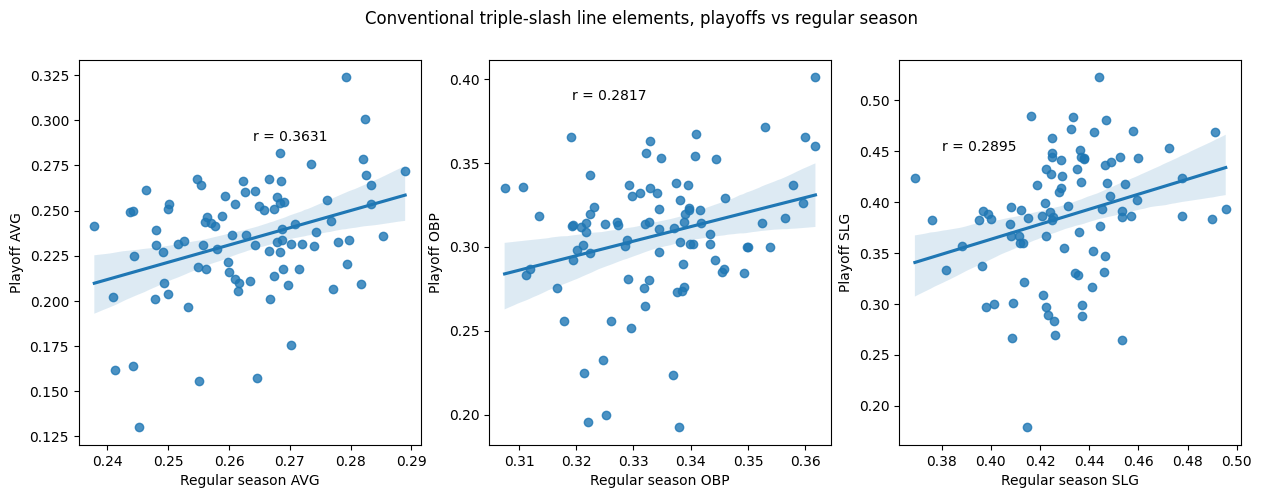

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Conventional triple-slash line elements, playoffs vs regular season')

#Plot AVG
sns.regplot(ax=axes[0],data=ch_rg_comp_stats_0224, x='AVG', y='ch_AVG')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['AVG'], y=ch_rg_comp_stats_0224['ch_AVG'])[0]
axes[0].set_xlabel('Regular season AVG')
axes[0].set_ylabel('Playoff AVG')
plt.text(0.1, 0.46, f'r = {str(round(r,4))}', fontsize=10)

#Plot OBP
sns.regplot(ax=axes[1],data=ch_rg_comp_stats_0224, x='OBP', y='ch_OBP')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['OBP'], y=ch_rg_comp_stats_0224['ch_OBP'])[0]
plt.text(0.23, 0.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('Regular season OBP')
axes[1].set_ylabel('Playoff OBP')

#Plot SLG
sns.regplot(ax=axes[2],data=ch_rg_comp_stats_0224, x='SLG', y='ch_SLG')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['SLG'], y=ch_rg_comp_stats_0224['ch_SLG'])[0]
plt.text(0.38, 0.45, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('Regular season SLG')
axes[2].set_ylabel('Playoff SLG')
plt.show()

Those correlations are not all that strong  - regular season AVG only explains 13.2% of the variance in playoff AVG, with an even lower value for OBP and SLG.

---

What about the proposed triple-slash line?

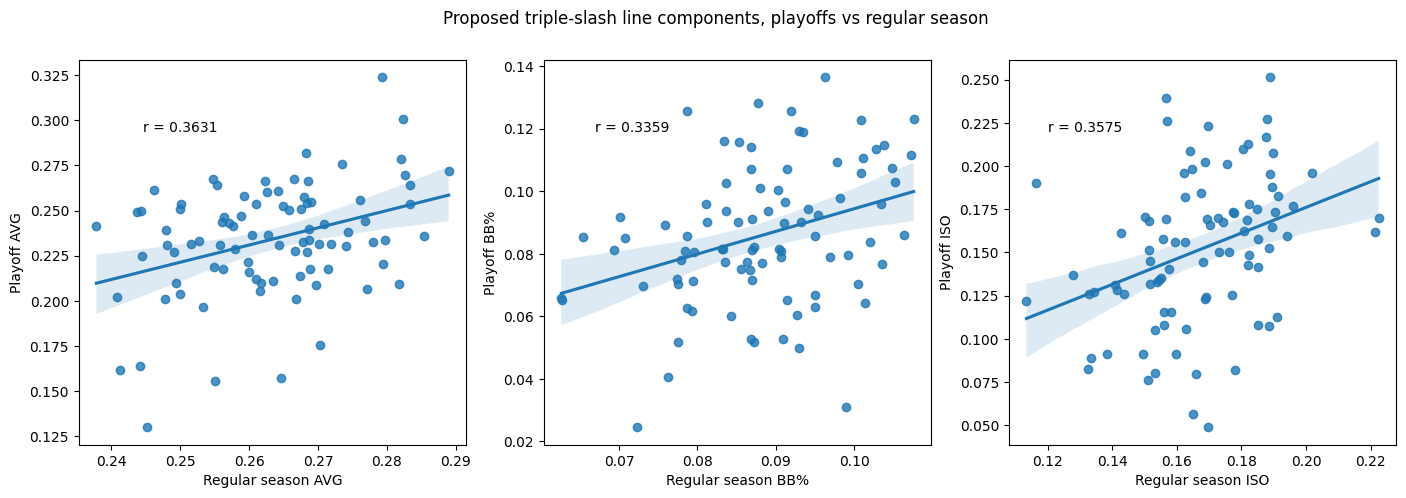

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(17,5))
fig.suptitle('Proposed triple-slash line components, playoffs vs regular season')

#Plot AVG
sns.regplot(ax=axes[0],data=ch_rg_comp_stats_0224, x='AVG', y='ch_AVG')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['AVG'], y=ch_rg_comp_stats_0224['ch_AVG'])[0]
plt.text(-0.16, 0.22, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('Regular season AVG')
axes[0].set_ylabel('Playoff AVG')

#Plot BB%
sns.regplot(ax=axes[1],data=ch_rg_comp_stats_0224, x='BB%', y='ch_BB%')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['BB%'], y=ch_rg_comp_stats_0224['ch_BB%'])[0]
plt.text(-0.02, 0.22, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('Regular season BB%')
axes[1].set_ylabel('Playoff BB%')

#Plot ISO
sns.regplot(ax=axes[2],data=ch_rg_comp_stats_0224, x='ISO', y='ch_ISO')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['ISO'], y=ch_rg_comp_stats_0224['ch_ISO'])[0]
plt.text(0.12, 0.22, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('Regular season ISO')
axes[2].set_ylabel('Playoff ISO')
plt.show()

All three have very similar mediocre correlations.

What about three true outcomes?

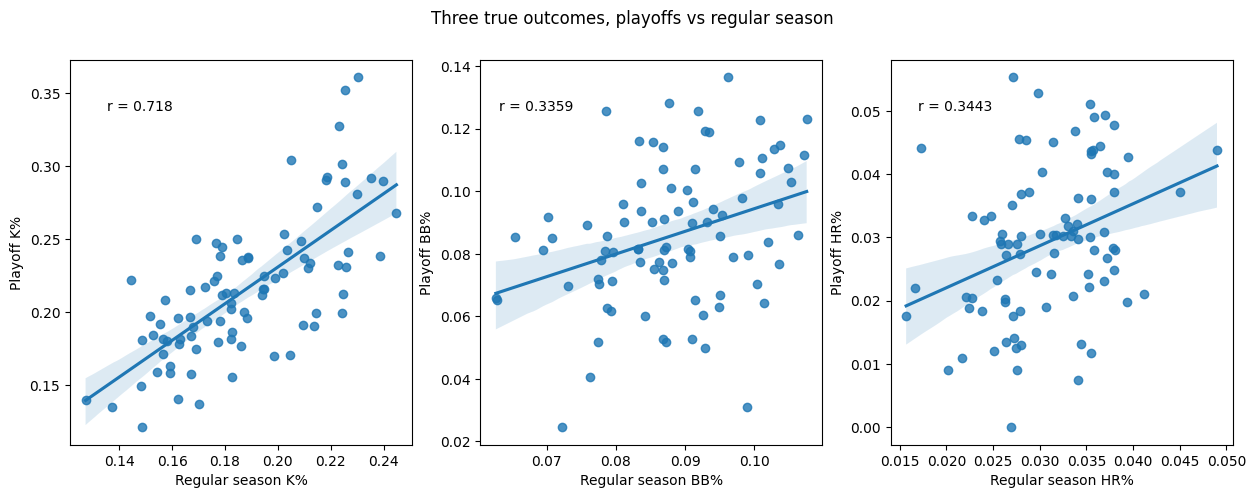

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Three true outcomes, playoffs vs regular season')

#Plot K%
sns.regplot(ax=axes[0],data=ch_rg_comp_stats_0224, x='K%', y='ch_K%')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['K%'], y=ch_rg_comp_stats_0224['ch_K%'])[0]
plt.text(-0.07, 0.05, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('Regular season K%')
axes[0].set_ylabel('Playoff K%')

#Plot BB%
sns.regplot(ax=axes[1],data=ch_rg_comp_stats_0224, x='BB%', y='ch_BB%')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['BB%'], y=ch_rg_comp_stats_0224['ch_BB%'])[0]
plt.text(-0.028, 0.05, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('Regular season BB%')
axes[1].set_ylabel('Playoff BB%')

#Plot HR%
sns.regplot(ax=axes[2],data=ch_rg_comp_stats_0224, x='HR%', y='ch_HR%')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['HR%'], y=ch_rg_comp_stats_0224['ch_HR%'])[0]
plt.text(0.017, 0.05, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('Regular season HR%')
axes[2].set_ylabel('Playoff HR%')
plt.show()

K% appears to be the only major offensive statistic that remains highly consistent between the regular season and playoffs.

How about pitching?

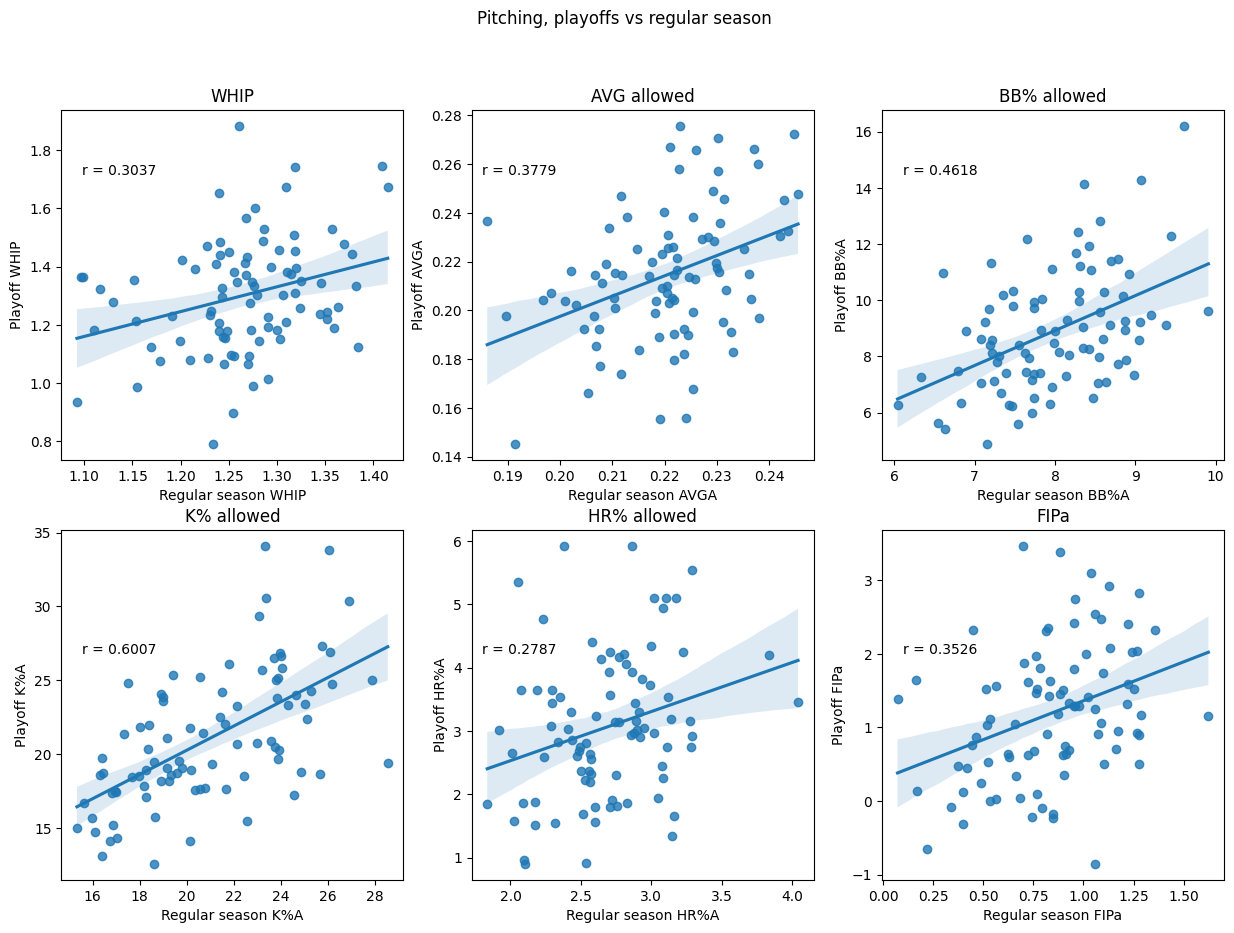

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Pitching, playoffs vs regular season')

#Plot WHIP
sns.regplot(ax=axes[0,0],data=ch_rg_comp_stats_0224, x='WHIP', y='ch_WHIP')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['WHIP'], y=ch_rg_comp_stats_0224['ch_WHIP'])[0]
plt.text(-4, 8.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,0].set_xlabel('Regular season WHIP')
axes[0,0].set_ylabel('Playoff WHIP')
axes[0,0].set_title('WHIP')

#Plot AVGA
sns.regplot(ax=axes[0,1],data=ch_rg_comp_stats_0224, x='AVGA', y='ch_AVGA')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['AVGA'], y=ch_rg_comp_stats_0224['ch_AVGA'])[0]
plt.text(-2, 8.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,1].set_xlabel('Regular season AVGA')
axes[0,1].set_ylabel('Playoff AVGA')
axes[0,1].set_title('AVG allowed')

#Plot BB%A
sns.regplot(ax=axes[0,2],data=ch_rg_comp_stats_0224, x='BB%A', y='ch_BB%A')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['BB%A'], y=ch_rg_comp_stats_0224['ch_BB%A'])[0]
plt.text(0.1, 8.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,2].set_xlabel('Regular season BB%A')
axes[0,2].set_ylabel('Playoff BB%A')
axes[0,2].set_title('BB% allowed')

#Plot K%A
sns.regplot(ax=axes[1,0],data=ch_rg_comp_stats_0224, x='K%A', y='ch_K%A')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['K%A'], y=ch_rg_comp_stats_0224['ch_K%A'])[0]
plt.text(-4,2, f'r = {str(round(r,4))}', fontsize=10)
axes[1,0].set_xlabel('Regular season K%A')
axes[1,0].set_ylabel('Playoff K%A')
axes[1,0].set_title('K% allowed')

#Plot HR%A
sns.regplot(ax=axes[1,1],data=ch_rg_comp_stats_0224, x='HR%A', y='ch_HR%A')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['HR%A'], y=ch_rg_comp_stats_0224['ch_HR%A'])[0]
plt.text(-2,2, f'r = {str(round(r,4))}', fontsize=10)
axes[1,1].set_xlabel('Regular season HR%A')
axes[1,1].set_ylabel('Playoff HR%A')
axes[1,1].set_title('HR% allowed')

#Plot FIPa
sns.regplot(ax=axes[1,2],data=ch_rg_comp_stats_0224, x='FIPa', y='ch_FIPa')
r = scipy.stats.pearsonr(x=ch_rg_comp_stats_0224['FIPa'], y=ch_rg_comp_stats_0224['ch_FIPa'])[0]
plt.text(0.1,2, f'r = {str(round(r,4))}', fontsize=10)
axes[1,2].set_xlabel('Regular season FIPa')
axes[1,2].set_ylabel('Playoff FIPa')
axes[1,2].set_title('FIPa')

plt.show()

K% correlates fairly well, BB% to a lesser extent, and the other metrics show relatively weak correlations.

On both sides of the ball, K% remains consistent between the regular season and playoffs.

#How does a historical era compare to the contemporary one?

At least in terms of what is focused on in public discourse, the contemporary era is very different from the past. In how the "good ol' days" are remembered, AVG was king, Ks were shameful for a hitter, and stealing bases was a vital part of the game. But Bill James and other key innovators of modern baseball thought didn't pull their ideas out of thin air; they studied those "good ol' days" and identified patterns that were not obvious to those around them.

As noted earlier, there is a spectrum of possibilities for how historical data compare to the present. At one extreme, the relationships between AVG, K%, SB, etc., and scoring runs have always been what they are now, with teams simply being more aware of those relationships and operating with them in mind. At the other extreme, the relative importance of metrics has shifted over time largely due to the choices teams have made, in something of a feedback loop. If everyone starts to believe that it isn't important to steal bases, teams of all calibers of offensive talent will cut back on them, reducing the correlation between base stealing and overall success.

For this section, we will examine the seasons from 1969 to 1993. Reasons for choosing this range of years as an era include:

- This comprises the full range of full seasons where each league was split into East and West divisions. Prior to this, both leagues were undivided units; 1994 was shortened due to a labor dispute, and 1995 introduced the Central divisions.

- In turn, this comprises the full range of years where the playoffs consisted of the LCS and World Series. 1995 saw the introduction of the Wild Card, marking the first time a non-division winner could reach the playoffs; the 1994 playoffs were cancelled.

- The late 1960s saw the introduction of the amateur draft in 1965 beginning to have an effect on the balance of power among teams. Prior to the draft, amateur players were typically signed by the highest bidder, allowing teams with larger budgets to dominate the sport. The draft allowed teams with any level of resources to acquire top talent. While we could choose from a range of years to say when the draft started making a mark on the league, 1969 saw Reggie Jackson, a first-round draft pick for Oakland, blossom into one of the game's best hitters, the kind of player the Athletics would not have been able to snag under the old system.

In [ ]:
pd6 = pd.read_csv('1969_93_teamstats.csv')

/tmp/ipython-input-1008534875.py:1: DtypeWarning: Columns (99) have mixed types. Specify dtype option on import or set low_memory=False.
  pd6 = pd.read_csv('1969_93_teamstats.csv')


In [ ]:
#We only want to look at regular-season games, so we'll need to filter on gametype.
#We also need to filter for 'value' stattype, as some games have more than one score line to
#address discrepancies between Retrosheet's records and official statistics.
df6 = pd6[(pd6['gametype']=='regular') & (pd6['stattype']=='value')]
df6.head()

gid team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
0  ATL196904070  SFN   0.0   1.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   
1  ATL196904070  ATL   0.0   1.0   2.0   0.0   0.0   0.0   0.0   0.0  ...   
2  CIN196904070  LAN   0.0   1.0   2.0   0.0   0.0   0.0   0.0   0.0  ...   
3  CIN196904070  CIN   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4  WS2196904070  NYA   0.0   2.0   2.0   4.0   0.0   0.0   0.0   0.0  ...   

   number   site  vishome  opp  win  loss  tie  gametype  box  pbp  
0       0  ATL01        v  ATL    0     1    0   regular    y    y  
1       0  ATL01        h  SFN    1     0    0   regular    y    y  
2       0  CIN07        v  CIN    1     0    0   regular    y    y  
3       0  CIN07        h  LAN    0     1    0   regular    y    y  
4       0  WAS10        v  WS2    1     0    0   regular    y    y  

[5 rows x 111 columns]

Most columns here contain information we don't need. Let's first rename the columns we want to preserve. Columns are named with respect to batter or pitcher; most pitcher variables will be specified with A (for allowed), most unspecified stat columns will be for batters. The exception to this is ER (a stat that typically only exists for pitchers).

In [ ]:
df6 = df6.rename(columns={'gid': 'Game ID', 'team': 'Team', 'lob': 'LOB', 'b_pa': 'PA', 'b_ab': 'AB', 'b_r': 'R', 'b_h': 'H',
                        'b_d': '2B', 'b_t': '3B','b_hr': 'HR', 'b_rbi': 'RBI', 'b_sh': 'SH', 'b_sf': 'SF', 'b_hbp': 'HBP',
                        'b_w': 'BB', 'b_iw': 'IBB', 'b_k': 'K', 'b_sb': 'SB', 'b_cs': 'CS', 'b_gdp': 'GIDP',
                        'p_ipouts': 'Pitcher Outs', 'p_bfp': 'BF', 'p_h': 'HA', 'p_d': '2BA', 'p_t': '3BA', 'p_hr': 'HRA',
                        'p_r': 'RA', 'p_er': 'ER', 'p_w': 'BBA', 'p_iw': 'IBBA', 'p_k': 'KA', 'p_hbp': 'HBPA',
                        'p_sh': 'SHA', 'p_sf': 'SFA', 'd_sb': 'SBA', 'd_cs': 'CSA', 'date': 'Date', 'win': 'W',
                        'loss': 'L'})
df6.head()

Game ID Team  inn1  inn2  inn3  inn4  inn5  inn6  inn7  inn8  ...  \
0  ATL196904070  SFN   0.0   1.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   
1  ATL196904070  ATL   0.0   1.0   2.0   0.0   0.0   0.0   0.0   0.0  ...   
2  CIN196904070  LAN   0.0   1.0   2.0   0.0   0.0   0.0   0.0   0.0  ...   
3  CIN196904070  CIN   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4  WS2196904070  NYA   0.0   2.0   2.0   4.0   0.0   0.0   0.0   0.0  ...   

   number   site  vishome  opp  W  L  tie  gametype  box  pbp  
0       0  ATL01        v  ATL  0  1    0   regular    y    y  
1       0  ATL01        h  SFN  1  0    0   regular    y    y  
2       0  CIN07        v  CIN  1  0    0   regular    y    y  
3       0  CIN07        h  LAN  0  1    0   regular    y    y  
4       0  WAS10        v  WS2  1  0    0   regular    y    y  

[5 rows x 111 columns]

In [ ]:
df6 = df6[['Game ID', 'Team', 'Date', 'W', 'L', 'LOB', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SH', 'SF', 'HBP', 'BB', 'IBB', 'K',
          'SB', 'CS', 'GIDP', 'Pitcher Outs', 'BF','HA', '2BA', '3BA', 'HRA', 'RA', 'ER', 'BBA', 'IBBA', 'KA', 'HBPA',
          'SHA', 'SFA', 'SBA', 'CSA']]
df6.head()

Game ID Team      Date  W  L   LOB    PA    AB  R     H  ...  RA   ER  \
0  ATL196904070  SFN  19690407  0  1   8.0  39.0  33.0  4   9.0  ...   5  5.0   
1  ATL196904070  ATL  19690407  1  0   6.0  36.0  33.0  5  10.0  ...   4  4.0   
2  CIN196904070  LAN  19690407  1  0  10.0  40.0  36.0  3   8.0  ...   2  2.0   
3  CIN196904070  CIN  19690407  0  1   4.0  33.0  30.0  2   4.0  ...   3  3.0   
4  WS2196904070  NYA  19690407  1  0   5.0  40.0  37.0  8   9.0  ...   4  4.0   

   BBA  IBBA    KA  HBPA  SHA  SFA  SBA  CSA  
0  2.0   0.0   5.0   0.0  1.0  0.0  2.0  0.0  
1  3.0   0.0   5.0   1.0  1.0  1.0  1.0  0.0  
2  3.0   0.0   5.0   0.0  0.0  0.0  0.0  0.0  
3  4.0   0.0  14.0   0.0  0.0  0.0  1.0  0.0  
4  2.0   0.0   4.0   0.0  0.0  0.0  0.0  0.0  

[5 rows x 39 columns]

In [ ]:
#Since we're dealing with multiple years, we need to create a season column based on the date.
df6['Season'] = df6['Date'].astype(str).str.slice(0,4)
df6['Season'] = df6['Season'].astype(int)
df6['Season'].tail()

104043    1993
104044    1993
104045    1993
104046    1993
104047    1993
Name: Season, dtype: int64

In [ ]:
#Now let's assemble the stats.

#Get column names
columns = df6.columns.to_list()
#Omit non-statistic columns
metrics = columns[2:]
metrics.remove('Date')
metrics.remove('Season')
metrics
years = df6['Season'].unique()
years

#Generate season stat dataframe
stats_6993 = pd.DataFrame()


#Since there are a variable number of teams per season, we can't get the season information
#using pd.repeat(30) on a year list. This time, we will add back season information to each
#year's temporary data frame after calculating the metrics.

for year in years:
  #Generate each year's temporary dataframe to feed into stats_6993
  season_stats = pd.DataFrame()
  for metric in metrics:
    #Calculate each year's metrics
    season_stats[metric] = df6[df6['Season']==year].groupby('Team')[metric].sum()
  season_stats['Season']=year
  stats_6993 = pd.concat([stats_6993, season_stats])

stats_6993 = stats_6993.reset_index()

stats_6993.head(48)

Team    W    L     LOB      PA      AB    R       H     2B    3B  ...  \
0   ATL   93   69  1107.0  6100.0  5460.0  691  1411.0  195.0  22.0  ...   
1   BAL  109   53  1200.0  6328.0  5518.0  779  1465.0  235.0  29.0  ...   
2   BOS   87   75  1165.0  6294.0  5494.0  743  1381.0  234.0  37.0  ...   
3   CAL   71   91  1115.0  5983.0  5316.0  528  1221.0  151.0  29.0  ...   
4   CHA   68   94  1189.0  6158.0  5450.0  625  1346.0  210.0  27.0  ...   
5   CHN   92   70  1186.0  6244.0  5530.0  720  1400.0  215.0  40.0  ...   
6   CIN   89   73  1134.0  6305.0  5634.0  798  1558.0  224.0  42.0  ...   
7   CLE   62   99  1077.0  6015.0  5364.0  573  1272.0  173.0  24.0  ...   
8   DET   90   72  1118.0  6155.0  5441.0  701  1316.0  188.0  29.0  ...   
9   HOU   81   81  1212.0  6197.0  5348.0  676  1284.0  208.0  40.0  ...   
10  KCA   69   93  1104.0  6124.0  5463.0  586  1311.0  179.0  32.0  ...   
11  LAN   85   77  1160.0  6167.0  5532.0  645  1405.0  185.0  52.0  ...   
12  MIN   97   65  1196.0  6424.0  5677.0  790  1520.0  246.0  32.0  ...   
13  MON   52  110  1144.0  6073.0  5419.0  582  1300.0  202.0  33.0  ...   
14  NYA   80   81  1088.0  5990.0  5308.0  562  1247.0  210.0  44.0  ...   
15  NYN  100   62  1116.0  6102.0  5427.0  632  1311.0  184.0  41.0  ...   
16  OAK   88   74  1245.0  6405.0  5614.0  740  1400.0  210.0  28.0  ...   
17  PHI   63   99  1087.0  6080.0  5408.0  645  1304.0  227.0  35.0  ...   
18  PIT   88   74  1189.0  6235.0  5626.0  725  1557.0  220.0  52.0  ...   
19  SDN   52  110  1067.0  5891.0  5357.0  468  1203.0  180.0  42.0  ...   
20  SE1   64   98  1130.0  6206.0  5444.0  639  1276.0  179.0  27.0  ...   
21  SFN   90   72  1280.0  6375.0  5474.0  713  1325.0  187.0  28.0  ...   
22  SLN   87   75  1189.0  6154.0  5536.0  595  1403.0  228.0  44.0  ...   
23  WS2   86   76  1181.0  6196.0  5448.0  694  1365.0  171.0  40.0  ...   
24  ATL   76   86  1157.0  6202.0  5546.0  736  1495.0  215.0  24.0  ...   
25  BAL  108   54  1262.0  6416.0  5545.0  792  1424.0  213.0  25.0  ...   
26  BOS   87   75  1149.0  6251.0  5535.0  786  1450.0  252.0  28.0  ...   
27  CAL   86   76  1115.0  6115.0  5532.0  631  1391.0  197.0  40.0  ...   
28  CHA   56  106  1145.0  6132.0  5514.0  633  1394.0  192.0  20.0  ...   
29  CHN   84   78  1130.0  6229.0  5491.0  806  1424.0  228.0  44.0  ...   
30  CIN  102   60  1178.0  6227.0  5540.0  775  1498.0  253.0  45.0  ...   
31  CLE   76   86  1111.0  6125.0  5462.0  649  1358.0  197.0  23.0  ...   
32  DET   79   83  1186.0  6200.0  5377.0  666  1282.0  207.0  38.0  ...   
33  HOU   79   83  1186.0  6306.0  5574.0  744  1446.0  250.0  47.0  ...   
34  KCA   65   97  1074.0  6129.0  5503.0  611  1341.0  202.0  41.0  ...   
35  LAN   87   74  1185.0  6293.0  5606.0  749  1515.0  233.0  67.0  ...   
36  MIL   65   97  1162.0  6173.0  5395.0  613  1305.0  202.0  24.0  ...   
37  MIN   98   64  1103.0  6143.0  5483.0  744  1438.0  230.0  41.0  ...   
38  MON   73   89  1219.0  6251.0  5411.0  687  1284.0  211.0  35.0  ...   
39  NYA   93   69  1152.0  6211.0  5492.0  680  1381.0  208.0  41.0  ...   
40  NYN   83   79  1211.0  6275.0  5443.0  695  1358.0  211.0  42.0  ...   
41  OAK   89   73  1118.0  6105.0  5376.0  678  1338.0  208.0  24.0  ...   
42  PHI   73   88  1093.0  6102.0  5456.0  594  1299.0  224.0  58.0  ...   
43  PIT   89   73  1177.0  6231.0  5637.0  729  1522.0  235.0  70.0  ...   
44  SDN   63   99  1093.0  6146.0  5494.0  681  1353.0  208.0  36.0  ...   
45  SFN   86   76  1275.0  6469.0  5578.0  831  1460.0  257.0  35.0  ...   
46  SLN   76   86  1199.0  6378.0  5689.0  744  1497.0  218.0  51.0  ...   
47  WS2   70   92  1196.0  6223.0  5460.0  626  1302.0  184.0  28.0  ...   

       ER    BBA   IBBA      KA  HBPA   SHA   SFA    SBA   CSA  Season  
0   568.0  438.0   49.0   893.0  27.0  90.0  31.0   78.0  27.0    1969  
1   463.0  498.0   53.0   897.0  22.0  52.0  35.0   48.0  51.0    1969  
2   639.0  685.0   42.0   935.0  48.0  62.0  40.0   84.0  5

Let's generate some common statistics from this table:

In [ ]:
#Batting Average
stats_6993['AVG'] = stats_6993['H']/stats_6993['AB']

#OBP
stats_6993['OBP'] = (stats_6993['H']+stats_6993['BB']+stats_6993['HBP'])/(stats_6993['AB']+stats_6993['BB']+stats_6993['HBP']+stats_6993['SF'])

#Singles
stats_6993['1B'] = stats_6993['H']-(stats_6993['2B']+stats_6993['3B']+stats_6993['HR'])

#SLG
stats_6993['SLG'] = (stats_6993['1B']+2*stats_6993['2B']+3*stats_6993['3B']+4*stats_6993['HR'])/stats_6993['AB']

#ISO
stats_6993['ISO'] = stats_6993['SLG']-stats_6993['AVG']

#BB%
stats_6993['BB%'] = stats_6993['BB']/stats_6993['PA']

#K%
stats_6993['K%'] = stats_6993['K']/stats_6993['PA']

#LOBa, approximate LOB%
stats_6993['LOBa'] = stats_6993['LOB']/(stats_6993['H']+stats_6993['BB']+stats_6993['HBP']-stats_6993['HR'])*100

#HR%
stats_6993['HR%'] = stats_6993['HR']/stats_6993['PA']

#BABIP
stats_6993['BABIP'] = (stats_6993['H']-stats_6993['HR'])/(stats_6993['AB'] - stats_6993['K']
                                                          - stats_6993['HR'] + stats_6993['SF'])

#SB%
stats_6993['SB%'] = stats_6993['SB']/(stats_6993['SB']+stats_6993['CS'])

#SBV, which calculates how many steals/caught stealing attempts the team is over/under the SB:CS ratio for being
#a net positive (novel)

stats_6993['SBV'] = stats_6993['SB']-3*stats_6993['CS']

#IP
stats_6993['IP']= stats_6993['Pitcher Outs']/3

#ERA
stats_6993['ERA']= stats_6993['ER']/stats_6993['IP']*9

#FIPa, which lacks the constant that brings it in line with ERA (semi-novel)
stats_6993['FIPa'] = (13*stats_6993['HRA'] + 3*(stats_6993['BBA'] + stats_6993['HBPA']) - 2*stats_6993['KA'])/stats_6993['IP']

#FIPh, which measures the FIP (with PA as the denominator) of the collective pitching a team's hitters have faced (novel)
stats_6993['FIPh'] = (13*stats_6993['HR'] + 3*(stats_6993['BB'] + stats_6993['HBP']) - 2*stats_6993['K'])/stats_6993['PA']

#AVGA, AVG against pitching staff
stats_6993['AVGA']= stats_6993['HA']/stats_6993['BF']

#WHIP, walks and hits per IP
stats_6993['WHIP'] = (stats_6993['HA']+stats_6993['BBA'])/stats_6993['IP']


#BB%A, BB% for pitchers
stats_6993['BB%A']= stats_6993['BBA']/stats_6993['BF']*100

#K%A, K% for pitchers
stats_6993['K%A']= stats_6993['KA']/stats_6993['BF']*100

#HR%A, HR% for pitchers
stats_6993['HR%A']= stats_6993['HRA']/stats_6993['BF']*100

#Runs per game
stats_6993['RPG'] = stats_6993['R']/(stats_6993['W']+stats_6993['L'])

#Runs allowed per game
stats_6993['RAPG'] = stats_6993['RA']/(stats_6993['W']+stats_6993['L'])

#Winning percentage
stats_6993['W%'] = stats_6993['W']/(stats_6993['W']+stats_6993['L'])

In [ ]:
#Calculating normalized statistics

#Get column names
columns = stats_6993.columns.to_list()
#Omit non-statistic columns
metrics = columns[3:]
metrics.remove('Season')
metrics.remove('W%')

norm_6993 = pd.DataFrame()
for year in years:
  #Concatenate together into a single dataframe of teams, seasons,
  season_stats = pd.DataFrame()
  for metric in metrics:
    lg_avg = stats_6993.loc[stats_6993['Season']==year,metric].mean()
    lg_std = stats_6993.loc[stats_6993['Season']==year,metric].std()
    season_stats[metric] = (stats_6993.loc[stats_6993['Season']==year, metric] - lg_avg)/lg_std
  norm_6993 = pd.concat([norm_6993, season_stats])

#Add back team names, records
norm_6993 = pd.concat([stats_6993.iloc[:,0:3], norm_6993], axis=1)
#Add back season
norm_6993 = pd.concat([norm_6993, stats_6993.iloc[:,-1]], axis=1)


norm_6993.describe()

W           L           LOB            PA            AB  \
count  636.000000  636.000000  6.360000e+02  6.360000e+02  6.360000e+02   
mean    79.613208   79.613208 -1.997005e-16 -8.749116e-16 -2.367079e-16   
std     12.326711   12.287043  9.809203e-01  9.809203e-01  9.809203e-01   
min     37.000000   42.000000 -3.110411e+00 -3.010566e+00 -2.288219e+00   
25%     72.000000   72.000000 -7.192284e-01 -7.089135e-01 -6.407439e-01   
50%     81.000000   79.000000  9.960110e-03 -3.761670e-02 -7.079625e-02   
75%     88.000000   88.000000  6.502340e-01  6.666531e-01  6.299505e-01   
max    109.000000  110.000000  3.931170e+00  3.973538e+00  3.088545e+00   

                  R             H            2B            3B            HR  \
count  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02   
mean  -1.040398e-16  2.304236e-16 -1.082293e-17  2.094760e-18 -2.793014e-17   
std    9.809203e-01  9.809203e-01  9.809203e-01  9.809203e-01  9.809203e-01   
min   -2.318229e+00 -2.440518e+00 -2.596684e+00 -2.304543e+00 -2.830564e+00   
25%   -6.987466e-01 -7.269449e-01 -7.101860e-01 -7.431598e-01 -6.926997e-01   
50%   -6.336101e-02 -5.558171e-02 -5.012284e-02 -1.383000e-01 -7.943671e-02   
75%    6.992723e-01  6.504762e-01  6.911108e-01  6.793844e-01  6.933821e-01   
max    2.707228e+00  2.990532e+00  2.931308e+00  2.955074e+00  2.722973e+00   

       ...          FIPa          FIPh          AVGA          WHIP  \
count  ...  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02   
mean   ...  1.815459e-17  2.793014e-17 -1.326682e-16  6.814954e-16   
std    ...  9.809203e-01  9.809203e-01  9.809203e-01  9.809203e-01   
min    ... -2.606885e+00 -2.278705e+00 -2.455955e+00 -2.581549e+00   
25%    ... -6.867629e-01 -7.383892e-01 -7.125082e-01 -6.883570e-01   
50%    ... -2.767362e-02 -6.959935e-02  2.168990e-02 -2.204629e-02   
75%    ...  6.777981e-01  7.432124e-01  6.819951e-01  6.685351e-01   
max    ...  2.649110e+00  2.585510e+00  2.482854e+00  2.680204e+00   

               BB%A           K%A          HR%A           RPG          RAPG  \
count  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02   
mean  -4.028923e-16  7.680788e-17  1.305734e-16 -6.179543e-17  1.200996e-16   
std    9.809203e-01  9.809203e-01  9.809203e-01  9.809203e-01  9.809203e-01   
min   -2.621768e+00 -2.885362e+00 -2.482761e+00 -2.322485e+00 -2.334816e+00   
25%   -7.182451e-01 -6.666470e-01 -7.272716e-01 -6.929043e-01 -7.288966e-01   
50%   -4.870765e-02 -5.318651e-02 -3.028462e-02 -7.092568e-02 -2.457641e-02   
75%    5.911223e-01  6.523713e-01  6.848184e-01  7.285291e-01  6.504972e-01   
max    3.487855e+00  3.086608e+00  2.810067e+00  2.675727e+00  2.782785e+00   

               W%  
count  636.000000  
mean     0.499974  
std      0.069319  
min      0.320988  
25%      0.454263  
50%      0.504679  
75%      0.549383  
max      0.672840  

[8 rows x 60 columns]

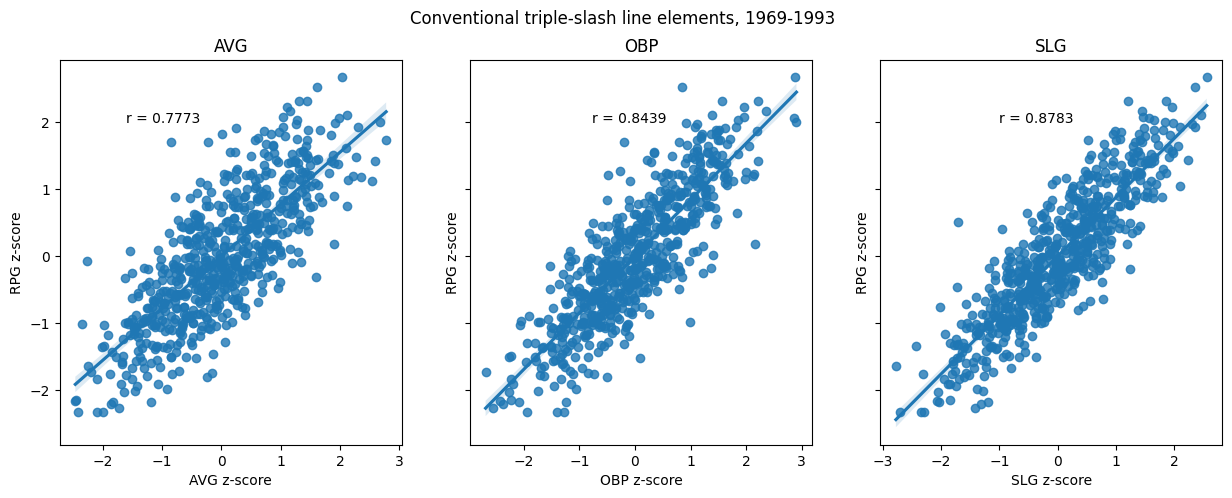

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Conventional triple-slash line elements, 1969-1993')

#Plot AVG
sns.regplot(ax=axes[0],data=norm_6993, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['AVG'], y=norm_6993['RPG'])[0]
plt.text(-16, 2, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('AVG z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('AVG')

#Plot OBP
sns.regplot(ax=axes[1],data=norm_6993, x='OBP', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['OBP'], y=norm_6993['RPG'])[0]
plt.text(-8, 2, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('OBP z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('OBP')

#Plot SLG
sns.regplot(ax=axes[2],data=norm_6993, x='SLG', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['SLG'], y=norm_6993['RPG'])[0]
plt.text(-1, 2, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('SLG z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('SLG')
plt.show()

AVG shows a slightly stronger correlation, and OBP and SLG slightly weaker, but overall, the same picture as 2002-2024 with SLG > OBP > AVG.

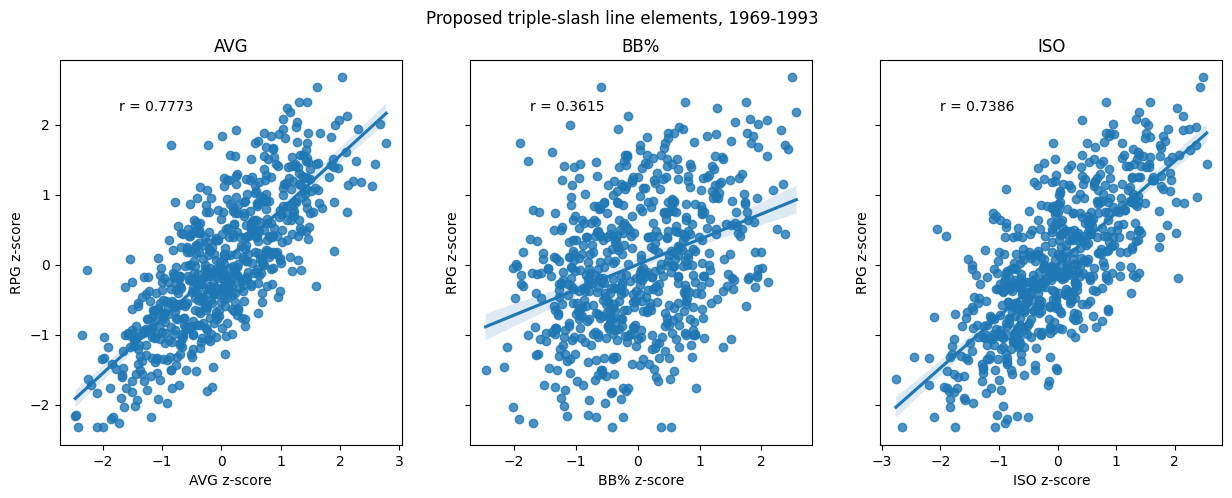

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Proposed triple-slash line elements, 1969-1993')

#Plot AVG
sns.regplot(ax=axes[0],data=norm_6993, x='AVG', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['AVG'], y=norm_6993['RPG'])[0]
plt.text(-16, 2.2, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('AVG z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('AVG')

#Plot BB%
sns.regplot(ax=axes[1],data=norm_6993, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['BB%'], y=norm_6993['RPG'])[0]
plt.text(-9, 2.2, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('BB% z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('BB%')

#Plot ISO
sns.regplot(ax=axes[2],data=norm_6993, x='ISO', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['ISO'], y=norm_6993['RPG'])[0]
plt.text(-2, 2.2, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('ISO z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('ISO')
plt.show()

AVG holds a slight edge over ISO here, with both about equal to their contemporary numbers. BB% has taken a noticeable dive in correlation compared to the contemporary era (r = 0.4608).

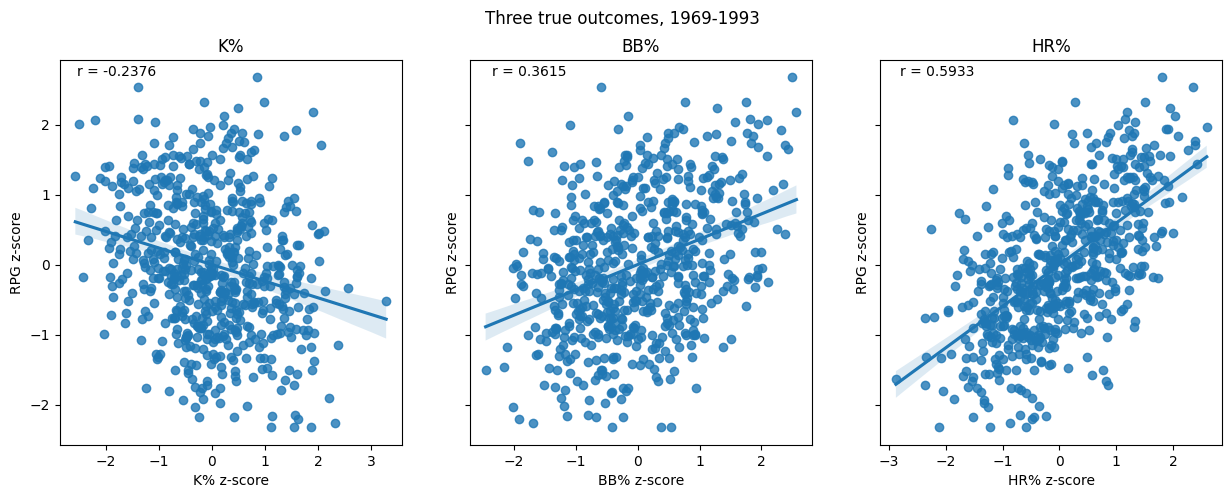

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Three true outcomes, 1969-1993')

#Plot K%
sns.regplot(ax=axes[0],data=norm_6993, x='K%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['K%'], y=norm_6993['RPG'])[0]
plt.text(-17.3, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('K% z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('K%')

#Plot BB%
sns.regplot(ax=axes[1],data=norm_6993, x='BB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['BB%'], y=norm_6993['RPG'])[0]
plt.text(-10, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('BB% z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('BB%')

#Plot HR%
sns.regplot(ax=axes[2],data=norm_6993, x='HR%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['HR%'], y=norm_6993['RPG'])[0]
plt.text(-2.8, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('HR% z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('HR%')
plt.show()

For hitters, K% had as little of an impact on scoring runs in 1969-1993 as it does in the contemporary era (r = -0.2734), even if they were viewed much more negatively by the players themselves. HR% was marginally less important than in the contemporary era (r = 0.6391).

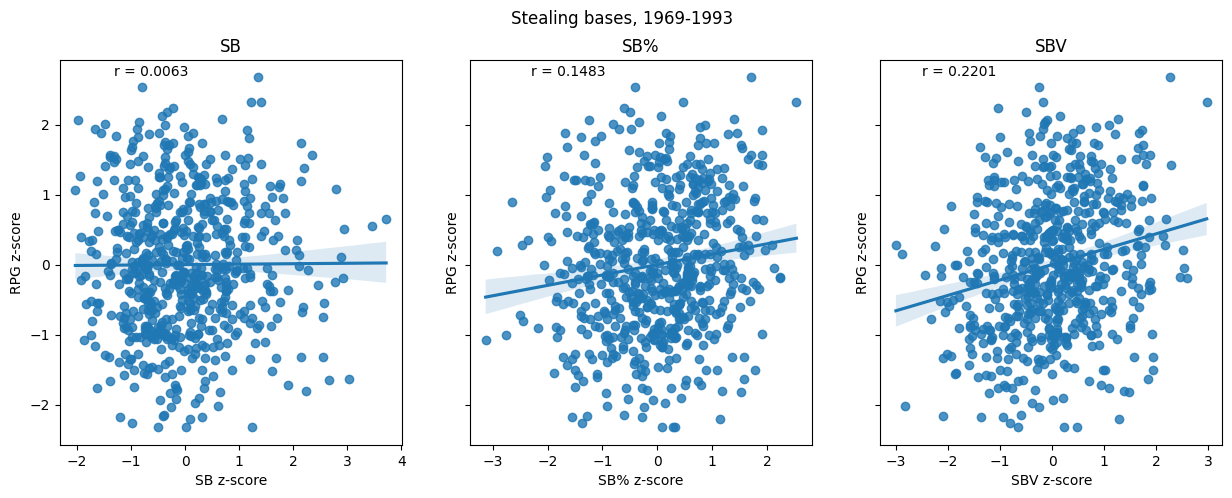

In [ ]:
#Set up subplots and title overall figure
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Stealing bases, 1969-1993')

#Plot SB
sns.regplot(ax=axes[0],data=norm_6993, x='SB', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['SB'], y=norm_6993['RPG'])[0]
plt.text(-18, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[0].set_xlabel('SB z-score')
axes[0].set_ylabel('RPG z-score')
axes[0].set_title('SB')

#Plot SB%
sns.regplot(ax=axes[1],data=norm_6993, x='SB%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['SB%'], y=norm_6993['RPG'])[0]
plt.text(-10, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[1].set_xlabel('SB% z-score')
axes[1].set_ylabel('RPG z-score')
axes[1].set_title('SB%')

#Plot SBV
sns.regplot(ax=axes[2],data=norm_6993, x='SBV', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['SBV'], y=norm_6993['RPG'])[0]
plt.text(-2.5, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[2].set_xlabel('SBV z-score')
axes[2].set_ylabel('RPG z-score')
axes[2].set_title('SBV')
plt.show()

Even in an era that valued base stealing, being better than average at it had little correlation with having an edge in run production.

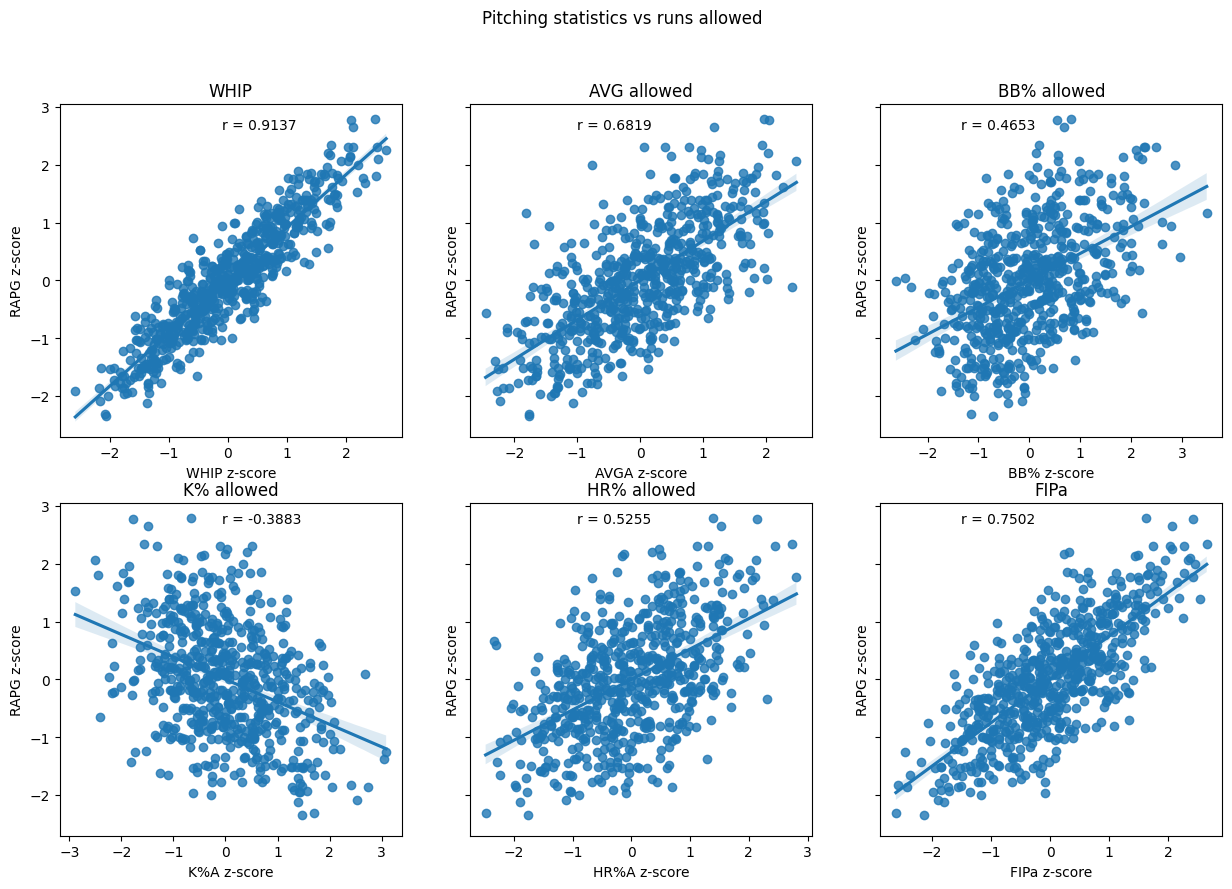

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,9.5), sharey=True)
fig.suptitle('Pitching statistics vs runs allowed')

#WHIP
sns.regplot(ax=axes[0,0],data=norm_6993, x='WHIP', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['WHIP'], y=norm_6993['RAPG'])[0]
plt.text(-14, 9.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,0].set_xlabel('WHIP z-score')
axes[0,0].set_ylabel('RAPG z-score')
axes[0,0].set_title('WHIP')

#AVGA
sns.regplot(ax=axes[0,1],data=norm_6993, x='AVGA', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['AVGA'], y=norm_6993['RAPG'])[0]
plt.text(-8, 9.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,1].set_xlabel('AVGA z-score')
axes[0,1].set_ylabel('RAPG z-score')
axes[0,1].set_title('AVG allowed')

#BB%A
sns.regplot(ax=axes[0,2],data=norm_6993, x='BB%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['BB%A'], y=norm_6993['RAPG'])[0]
plt.text(-1.5, 9.5, f'r = {str(round(r,4))}', fontsize=10)
axes[0,2].set_xlabel('BB% z-score')
axes[0,2].set_ylabel('RAPG z-score')
axes[0,2].set_title('BB% allowed')

#K%A
sns.regplot(ax=axes[1,0],data=norm_6993, x='K%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['K%A'], y=norm_6993['RAPG'])[0]
plt.text(-14, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[1,0].set_xlabel('K%A z-score')
axes[1,0].set_ylabel('RAPG z-score')
axes[1,0].set_title('K% allowed')

#HR%A
sns.regplot(ax=axes[1,1],data=norm_6993, x='HR%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['HR%A'], y=norm_6993['RAPG'])[0]
plt.text(-8, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[1,1].set_xlabel('HR%A z-score')
axes[1,1].set_ylabel('RAPG z-score')
axes[1,1].set_title('HR% allowed')

#FIPa
sns.regplot(ax=axes[1,2],data=norm_6993, x='FIPa', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['FIPa'], y=norm_6993['RAPG'])[0]
plt.text(-1.5, 2.7, f'r = {str(round(r,4))}', fontsize=10)
axes[1,2].set_xlabel('FIPa z-score')
axes[1,2].set_ylabel('RAPG z-score')
axes[1,2].set_title('FIPa')

plt.show()

WHIP z-score is as predictive of runs allowed z-score in this era as it is in the contemporary era (r = 0.9222). AVG, BB%, and HR% have slightly weaker correlations in this era.

K% has a much weaker relationship with runs allowed here compared to the contemporary era (r = -0.6662). Note that the change in predictive value of K% for pitching was not accompanied by any meaningful change in the predictive value of K% for offense. I will explore potential reasons for this in the discussion.

#Discussion

The data in this notebook do not uniformly support "old-school" or "new-school" baseball thinking. Contemporary thinking is correct in asserting that - at least since 1969 - stolen bases have never been a major determinant in which teams are best at scoring runs, as well as that Ks have never been all that detrimental to hitters. However, these data also push back on the idea that "AVG doesn't matter." While OBP and SLG are more predictive of run scoring than AVG, this is because they combine information from AVG with information from metrics less predictive than AVG (BB%) or as predictive as AVG (ISO), respectively.

For an example that's exaggerated for illustrative purposes, a holistic approach tells you that a team with a .245 AVG can be much better than a .305 AVG team if they have a BB% that's better by 10 percentage points and an ISO that's better by 20 percentage points. At the same time, if teams A and B have identical BB% and ISO but team A has a better AVG, while all 3 parts of an AVG/OBP/SLG triple-slash will be better for team A, it's the difference in AVG that explains why team A is better, not OBP or SLG. It would be more accurate to say that AVG doesn't have the final say on the quality of a team.

As an analogy, let's say you wanted to develop an index for how likely people are to enjoy being outside on a given day. The two metrics at your disposal are the average actual temperature and the average "real-feel" temperature, which factors in wind and humidity to approximate what temperature it "actually" feels like. The "real-feel" temperature will outperform the actual temperature; temperature alone would always consider 86F/30C more pleasant than 95F/35C, but if the former is extremely humid and the latter is a dry heat, the latter would likely be more comfortable for most people. For this model, "real-feel" temperature is more important than actual temperature. But it wouldn't be tempting to say that temperature *doesn't matter;* the more informative metric is determined through interactions between temperature and other factors, and no amount of humidity on a 68F/20C day is going to make it less comfortable than an 14F/-10C day.

---

The example above of teams with different AVG but identical BB% and ISO is representative of why I feel AVG/BB%/ISO is a clearer way of displaying a team's abilities than AVG/OBP/SLG, especially in relation to other teams. If we wanted to know what element(s) of team A's game makes them better than team B with a conventional triple-slash line, we'd have to subtract their AVGs from their OBPs to approximate their BB% and their AVGs from their SLGs to determine their power. With the proposed triple-slash, no math is required to see that AVG is what sets the two apart.

I also feel that the conventional triple-slash line makes it easier to fall into the trap of thinking "AVG doesn't matter," since AVG is indeed the least important of the 3 metrics in that group. When viewed in terms of how much better or worse a lineup is than average, AVG and ISO are equally important for determining how a lineup's run production stacks up against the competition. This relationship is easier to appreciate in an AVG/BB%/ISO triple-slash line.

---

I noted above an asymmetry in the importance of K% between hitters and pitchers across the two eras. Let's bring those data together in one chart:


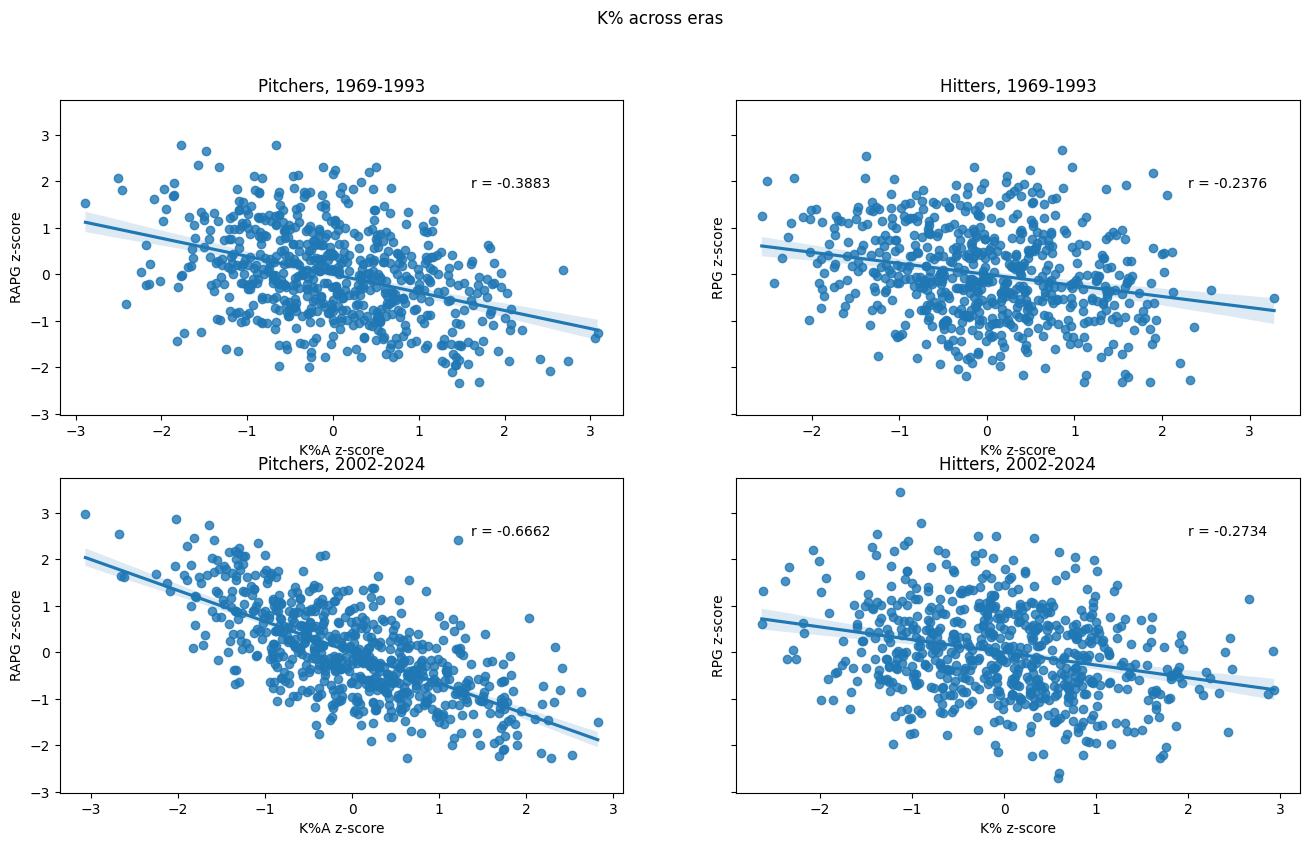

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,9), sharey=True)
fig.suptitle('K% across eras')

#Historic pitching
sns.regplot(ax=axes[0,0],data=norm_6993, x='K%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_6993['K%A'], y=norm_6993['RAPG'])[0]
plt.text(-5.8, 10, f'r = {str(round(r,4))}', fontsize=10)
axes[0,0].set_xlabel('K%A z-score')
axes[0,0].set_ylabel('RAPG z-score')
axes[0,0].set_title('Pitchers, 1969-1993')

#Historic hitting
sns.regplot(ax=axes[0,1],data=norm_6993, x='K%', y='RPG')
r = scipy.stats.pearsonr(x=norm_6993['K%'], y=norm_6993['RPG'])[0]
plt.text(2, 10, f'r = {str(round(r,4))}', fontsize=10)
axes[0,1].set_xlabel('K% z-score')
axes[0,1].set_ylabel('RPG z-score')
axes[0,1].set_title('Hitters, 1969-1993')

#Contemporary pitching
sns.regplot(ax=axes[1,0],data=norm_0224, x='K%A', y='RAPG')
r = scipy.stats.pearsonr(x=norm_0224['K%A'], y=norm_0224['RAPG'])[0]
plt.text(-5.8, 2.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1,0].set_xlabel('K%A z-score')
axes[1,0].set_ylabel('RAPG z-score')
axes[1,0].set_title('Pitchers, 2002-2024')

#Contemporary hitting
sns.regplot(ax=axes[1,1],data=norm_0224, x='K%', y='RPG')
r = scipy.stats.pearsonr(x=norm_0224['K%'], y=norm_0224['RPG'])[0]
plt.text(2, 2.5, f'r = {str(round(r,4))}', fontsize=10)
axes[1,1].set_xlabel('K% z-score')
axes[1,1].set_ylabel('RPG z-score')
axes[1,1].set_title('Hitters, 2002-2024')

plt.show()

K% spiked in importance for pitching staffs in the contemporary era, whereas it remained unimportant for hitters in both eras. Giving pitchers a large incentive to strike hitters out without a corresponding strong penalty for hitters who strike out (due to power-focused approaches to hitting increasing HRs while also increasing Ks) creates an environment where Ks become a much more frequent occurrence. It also raises the question of how excelling in K% became correlated with being better at giving up fewer runs, given that the simplest explanation would have been that the penalty for hitters striking out went up.

A key element of this relationship is that we are looking at the effectiveness of an entire pitching staff, not any individual pitcher, and how pitching staffs are deployed has changed greatly over the decades. While a K guarantees that a hitter is out (whereas a ball in play almost always has the chance of landing for a hit), it also requires a bare minimum of 3 pitches, usually more. In contrast, a ball in play could get a hitter out in 1 or 2 pitches and can happen in any count (while a K can only happen in a count with 2 strikes). Thus, aiming for Ks tends to require more pitches than aiming to get outs on balls in play.

That's a problem in an era where starting pitchers are expected to go deep into games, as was the case historically. A pitcher looking to pitch through at least the 7th inning is incentivized to get outs in as few pitches as possible, which promotes pitching to contact. In more recent years, the rise of elite reliever units has enabled teams to value quality of innings over quantity of innings from their starters. With less need to keep themselves deep into games, starters are freer to pursue Ks, with managers knowing that whoever comes in to replace their starter will also provide quality pitching.

---

As mentioned above, the relationships in this analysis were all explored at the team level, not the player level. It is entirely possible that team-level dynamics do not carry over to individual players, and future analyses should explore this.

I chose to look at the team level because, outside of a hitter driving themselves in with a HR, scoring runs involves the actions of multiple players, which requires an assessment of how much each player's actions contribute to how much the team scored. The question of attributing runs allowed to the actions of any individual pitcher is even thornier; for example, if a starting pitcher gives up a double, gets removed, and then the reliever gives up a single, allowing the baserunner to score, how responsible is each pitcher for the run? There are plenty of analytical tools that address these questions, but there is no true consensus on which tools are best. As such, I felt that at this stage, it would be best to look at the collective activity of a team, with future work investigating how I would choose to allocate responsibility to each player.

#Conclusion

Excelling at hitting for average and for power are equally important for predicting how exceptional a team is at scoring runs, with excelling at drawing BBs being less important than either while still very much mattering. A triple-slash line of AVG/BB%/ISO displays average, walk, and power information at a glance, whereas AVG/OBP/SLG requires additional math to get (a close approximation of) walk and power information.

WHIP is highly predictive of runs allowed for a pitching staff, with HR% providing a useful supplement for predictive models. K% helps determine the strategy a pitching staff favors (pitching for Ks vs pitching to contact) and provides insight into the likelihood of their success being sustainable over time. Thus, I propose a pitching triple-slash line of WHIP/HR%/K%.

A higher K% is not necessarily bad for offenses. Striking out in the name of successfully achieving greater power is not the same as striking out because of poor pitch recognition or bat control.

How a team performs during the regular season is not that strong of a predictor of how they'll perform in the high-pressure, small sample of the playoffs. Whether that affects the idea that "the best team in the league wins the World Series" depends on how you choose to value performance during the grind of a 162-game season, playing opponents of varying skill, versus performance in a small window of games against the best opponents.

The shift in what's widely considered important for team success over the last few decades has largely been due to recognizing the underlying patterns in prior decades of the sport, even if teams in those decades were focused on excelling in different elements of the game. The primary exception is K% for pitching staffs; as teams have enlarged their bullpens with high-end relievers, every member of the pitching staff is freer to chase Ks with reduced concern for the impact on how long they can stay in the game.